In [1]:
from matplotlib import pyplot as plt
%matplotlib widget
import matplotlib
matplotlib.use('nbagg')

In [2]:
import numpy as np
import dill
import os


class Data:
    def __init__(self, column_names, data):
        
        self.names = column_names
        self.data = data
        
        n = {}
        for key, value in enumerate(self.names):
            n[value] = key
        self.n = n
        
    def get(self, *args) -> np.ndarray:
        out = []
        for arg in args:
            out.append(self.data[:, self.n[arg]])
        out = np.asarray(out)
        if len(args) == 1:
            return out[0]
        return out
        
    def dist(self, prefix: str) -> 'Data':
        cond = np.asarray([str(distr_name).find(prefix) + 1
                           for distr_name in self.get('distr_name')], dtype=bool)
        return Data(column_names=self.names, data=self.data[cond])
        
    def select(self, **kwargs) -> 'Data':
        cond = np.asarray([True for _ in range(len(self.data))])
        for key, value in kwargs.items():
            d = self.get(str(key)).astype(type(value))
            cond = np.isclose(d, value) & cond
        return Data(column_names=self.names, data=self.data[cond])
    

def means(arr) -> float:
    return np.asarray([val.mean for val in arr])

def mins(arr) -> float:
    return np.asarray([val.min for val in arr])

def maxs(arr) -> float:
    return np.asarray([val.max for val in arr])


def bind(*arrays):
    return tuple(np.asarray(sorted(list(zip(*arrays)), key=lambda e: e[0])).T)


linestyles = {
     'loosely dotted':        (0, (1, 10)),
     'dotted':                (0, (1, 1)),
     'densely dotted':        (0, (1, 1)),

     'loosely dashed':        (0, (5, 10)),
     'dashed':                (0, (5, 5)),
     'densely dashed':        (0, (5, 1)),

     'loosely dashdotted':    (0, (3, 10, 1, 10)),
     'dashdotted':            (0, (3, 5, 1, 5)),
     'densely dashdotted':    (0, (3, 1, 1, 1)),

     'dashdotdotted':         (0, (3, 5, 1, 5, 1, 5)),
     'loosely dashdotdotted': (0, (3, 10, 1, 10, 1, 10)),
     'densely dashdotdotted': (0, (3, 1, 1, 1, 1, 1))
}

In [3]:
with open('post_data_theta0_kernel60_distrL2.bin', 'rb') as dump:
    data = dill.load(dump)

In [4]:
# data[0]

In [5]:
data = Data(column_names=data[0], data=data[1:])

In [6]:
# len(data.data)

In [7]:
# len(data.dist('L2').data)

In [8]:
# len(data.dist('L3').data)

In [9]:
# percentages = np.unique(data.dist('L2').select(beta=0.3).get('required_percentage'))
# percentages

In [10]:
# eta, *W = \
#     data.dist('L2').select(beta=0.3, required_percentage=0.6210526315789473, nu1=22.2, nu2=27).get(
#        'eta', 'W_true', 'Wr', 'Wrs', 'Wrss'
#     )

# eta, W_true, Wr, Wrs, Wrss = bind(eta, *map(means, W))

# plt.figure()
# plt.plot(eta, W_true, marker='x', color='black', linewidth=2)
# plt.plot(eta, Wr, marker='x', color='crimson', linewidth=1.5)
# plt.plot(eta, Wrs, marker='x', color='darkblue', linewidth=1.5)

In [11]:
# plt.figure()

# # plt.title('L2')

# eta, *W = \
#     data.dist('L2').select(beta=0.3, required_percentage=0.6210526315789473, nu1=22.2, nu2=27).get(
#        'eta', 'W_true', 'Wr', 'Wrs', 'Wrss'
#     )

# eta, W_true, Wr, Wrs, Wrss = bind(eta, *map(means, W))

# plt.plot(eta, W_true, marker='x', color='black', linewidth=2, linestyle='-')
# plt.text(np.min(eta), np.max(W_true), 'Cloud amount: {:.2f}%'.format(0.23423))

# plt.plot(eta, Wr, marker='x', color='darkblue', linewidth=2, linestyle=linestyles['densely dashed'])
# plt.plot(eta, Wrs, marker='x', color='darkblue', linewidth=1.5, linestyle='--')


# eta, *W = \
#     data.dist('L2').select(beta=0.3, required_percentage=0.6210526315789473, nu1=22.2, nu2=36).get(
#        'eta', 'W_true', 'Wr', 'Wrs', 'Wrss'
#     )

# eta, W_true, Wr, Wrs, Wrss = bind(eta, *map(means, W))

# plt.plot(eta, Wr, marker='x', color='forestgreen', linewidth=2, linestyle=linestyles['densely dashdotted'])
# plt.plot(eta, Wrs, marker='x', color='forestgreen', linewidth=1.5, linestyle='-.')

# plt.xlabel(r'Parameter $\eta$, dimensionless')
# plt.ylabel(r'Retrieved LWC in a resolution element, kg/m$^2$')

In [12]:
# plt.figure()

# # plt.title('L2')

# eta, *Q = \
#     data.dist('L2').select(beta=0.3, required_percentage=0.6210526315789473, nu1=22.2, nu2=27).get(
#        'eta', 'Q_true', 'Qr', 'Qrs', 'Qrss'
#     )

# eta, Q_true, Qr, Qrs, Qrss = bind(eta, *map(means, Q))

# plt.plot(eta, Q_true, marker='x', color='black', linewidth=2, linestyle='-')
# plt.text(np.min(eta), 2.2, 'Cloud amount: {:.2f}%'.format(0.23423))

# plt.plot(eta, Qr, marker='x', color='darkblue', linewidth=2, linestyle=linestyles['densely dashed'])
# plt.plot(eta, Qrs, marker='x', color='darkblue', linewidth=1.5, linestyle='--')


# eta, *Q = \
#     data.dist('L2').select(beta=0.3, required_percentage=0.6210526315789473, nu1=22.2, nu2=36).get(
#        'eta', 'Q_true', 'Qr', 'Qrs', 'Qrss'
#     )

# eta, Q_true, Qr, Qrs, Qrss = bind(eta, *map(means, Q))

# plt.plot(eta, Qr, marker='x', color='forestgreen', linewidth=2, linestyle=linestyles['densely dashdotted'])
# plt.plot(eta, Qrs, marker='x', color='forestgreen', linewidth=1.5, linestyle='-.')

# plt.xlabel(r'Parameter $\eta$, dimensionless')
# plt.ylabel(r'Retrieved TWV in a resolution element, g/cm$^2$')

### Generate animations (dynamic y-axis)

#### eta variance

##### LWC

In [13]:
# savepath = os.path.join('fig', 'L2', 'eta_variance', 'LWC')
# if not os.path.exists(savepath):
#     os.makedirs(savepath)

# for i, p in enumerate(np.unique(data.dist('L2').select(beta=0.3).get('required_percentage'))):
    
#     plt.figure()

#     # plt.title('L2')

#     eta, *W = \
#         data.dist('L2').select(beta=0.3, required_percentage=p, nu1=22.2, nu2=27).get(
#            'eta', 'W_true', 'Wr', 'Wrs', 'Wrss'
#         )

#     eta, W_true, Wr, Wrs, Wrss = bind(eta, *map(means, W))

#     plt.plot(eta, W_true, marker='x', color='black', linewidth=2, linestyle='-')
#     plt.text(np.min(eta), np.max(W_true), 'Cloud amount: {:.0f}%'.format(np.round(p*100, decimals=0)))

#     plt.plot(eta, Wr, marker='x', color='darkblue', linewidth=2, linestyle=linestyles['densely dashed'])
#     plt.plot(eta, Wrs, marker='x', color='darkblue', linewidth=1.5, linestyle='--')


#     eta, *W = \
#         data.dist('L2').select(beta=0.3, required_percentage=p, nu1=22.2, nu2=36).get(
#            'eta', 'W_true', 'Wr', 'Wrs', 'Wrss'
#         )

#     eta, W_true, Wr, Wrs, Wrss = bind(eta, *map(means, W))

#     plt.plot(eta, Wr, marker='x', color='forestgreen', linewidth=2, linestyle=linestyles['densely dashdotted'])
#     plt.plot(eta, Wrs, marker='x', color='forestgreen', linewidth=1.5, linestyle='-.')

#     plt.xlabel(r'Parameter $\eta$, dimensionless')
#     plt.ylabel(r'Retrieved LWC in a resolution element, kg/m$^2$')
    
#     plt.savefig(os.path.join(savepath, '{}.png'.format(str(i).zfill(2))), dpi=300)

##### TWV

In [14]:
# savepath = os.path.join('fig', 'L2', 'eta_variance', 'TWV')
# if not os.path.exists(savepath):
#     os.makedirs(savepath)

# for i, p in enumerate(np.unique(data.dist('L2').select(beta=0.3).get('required_percentage'))):
    
#     plt.figure()

#     # plt.title('L2')

#     eta, *Q = \
#         data.dist('L2').select(beta=0.3, required_percentage=p, nu1=22.2, nu2=27).get(
#            'eta', 'Q_true', 'Qr', 'Qrs', 'Qrss'
#         )

#     eta, Q_true, Qr, Qrs, Qrss = bind(eta, *map(means, Q))

#     plt.plot(eta, Q_true, marker='x', color='black', linewidth=2, linestyle='-')
#     plt.text(np.min(eta), 2.2, 'Cloud amount: {:.0f}%'.format(np.round(p*100, decimals=0)))

#     plt.plot(eta, Qr, marker='x', color='darkblue', linewidth=2, linestyle=linestyles['densely dashed'])
#     plt.plot(eta, Qrs, marker='x', color='darkblue', linewidth=1.5, linestyle='--')


#     eta, *Q = \
#         data.dist('L2').select(beta=0.3, required_percentage=p, nu1=22.2, nu2=36).get(
#            'eta', 'Q_true', 'Qr', 'Qrs', 'Qrss'
#         )

#     eta, Q_true, Qr, Qrs, Qrss = bind(eta, *map(means, Q))

#     plt.plot(eta, Qr, marker='x', color='forestgreen', linewidth=2, linestyle=linestyles['densely dashdotted'])
#     plt.plot(eta, Qrs, marker='x', color='forestgreen', linewidth=1.5, linestyle='-.')

#     plt.xlabel(r'Parameter $\eta$, dimensionless')
#     plt.ylabel(r'Retrieved TWV in a resolution element, g/cm$^2$')
    
#     plt.ylim((1.41, 2.4))
    
#     plt.savefig(os.path.join(savepath, '{}.png'.format(str(i).zfill(2))), dpi=300)

#### beta variance

##### LWC

In [15]:
# savepath = os.path.join('fig', 'L2', 'beta_variance', 'LWC')
# if not os.path.exists(savepath):
#     os.makedirs(savepath)

# for i, p in enumerate(np.unique(data.dist('L2').select(eta=0.93).get('required_percentage'))):
    
#     plt.figure()

#     # plt.title('L2')

#     eta, *W = \
#         data.dist('L2').select(eta=0.93, required_percentage=p, nu1=22.2, nu2=27).get(
#            'beta', 'W_true', 'Wr', 'Wrs', 'Wrss'
#         )

#     eta, W_true, Wr, Wrs, Wrss = bind(eta, *map(means, W))

#     plt.plot(eta, W_true, marker='x', color='black', linewidth=2, linestyle='-')
#     plt.text(np.min(eta), np.max(W_true), 'Cloud amount: {:.0f}%'.format(np.round(p*100, decimals=0)))

#     plt.plot(eta, Wr, marker='x', color='darkblue', linewidth=2, linestyle=linestyles['densely dashed'])
#     plt.plot(eta, Wrs, marker='x', color='darkblue', linewidth=1.5, linestyle='--')


#     eta, *W = \
#         data.dist('L2').select(eta=0.93, required_percentage=p, nu1=22.2, nu2=36).get(
#            'beta', 'W_true', 'Wr', 'Wrs', 'Wrss'
#         )

#     eta, W_true, Wr, Wrs, Wrss = bind(eta, *map(means, W))

#     plt.plot(eta, Wr, marker='x', color='forestgreen', linewidth=2, linestyle=linestyles['densely dashdotted'])
#     plt.plot(eta, Wrs, marker='x', color='forestgreen', linewidth=1.5, linestyle='-.')

#     plt.xlabel(r'Parameter $\beta$, dimensionless')
#     plt.ylabel(r'Retrieved LWC in a resolution element, kg/m$^2$')
    
#     plt.savefig(os.path.join(savepath, '{}.png'.format(str(i).zfill(2))), dpi=300)

### Generate animations (fixed y-axis)

#### eta variance, beta fixed

In [22]:
data.names

array(['angle', 'distr_no', 'distr_name', 'alpha', 'Dm', 'dm', 'eta',
       'beta', 'cl_bottom', 'xi', 'K', 'required_percentage', 'Q_TRUE',
       'W_TRUE', 'kernel', 'Q_true', 'W_true', 'efl_H', 'freq_pair_no',
       'nu1', 'nu2', 'tb_nu1', 'tb_nu2', 'tau_nu1', 'tau_nu2',
       'efl_tb_nu1', 'efl_tb_nu2', 'efl_tau_nu1', 'efl_tau_nu2', 'Qr',
       'Wr', 'Qrs', 'Wrs', 'Qrss', 'Wrss', 'Delta_Qr', 'Delta_Wr',
       'Delta_Qrs', 'Delta_Wrs', 'Delta_Qrss', 'Delta_Wrss', 'relerr_Qr',
       'relerr_Wr', 'relerr_Qrs', 'relerr_Wrs', 'relerr_Qrss',
       'relerr_Wrss'], dtype=object)

##### LWC

<IPython.core.display.Javascript object>


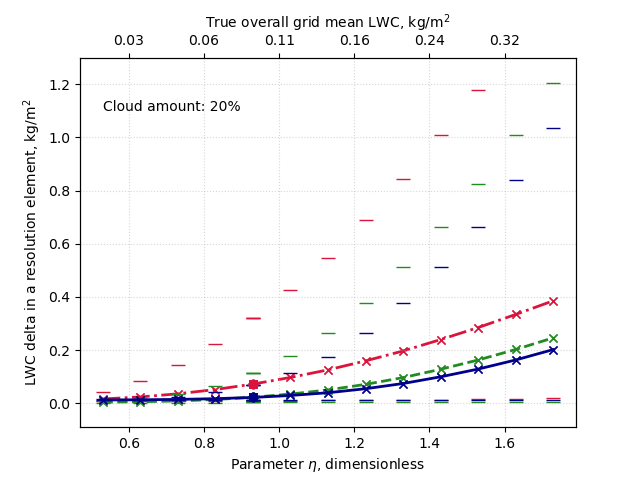

/tmp/ipykernel_23018/2843658047.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


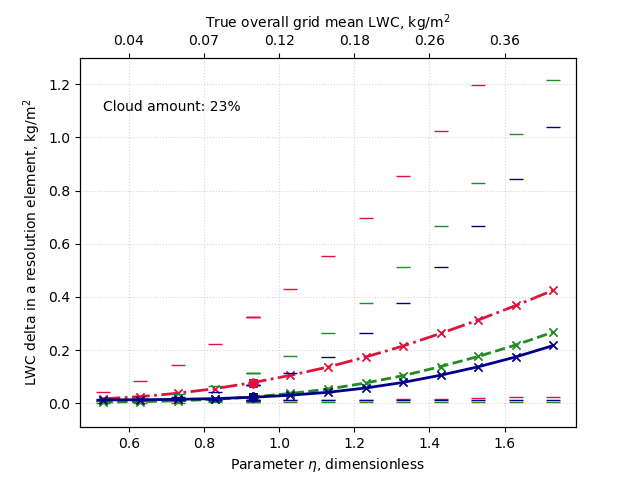

/tmp/ipykernel_23018/2843658047.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


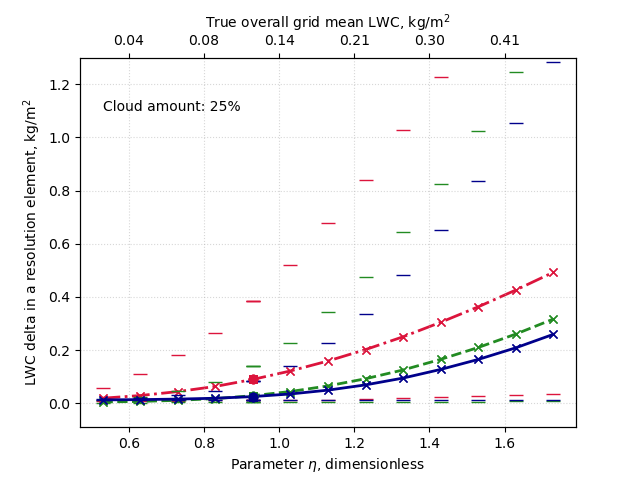

/tmp/ipykernel_23018/2843658047.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


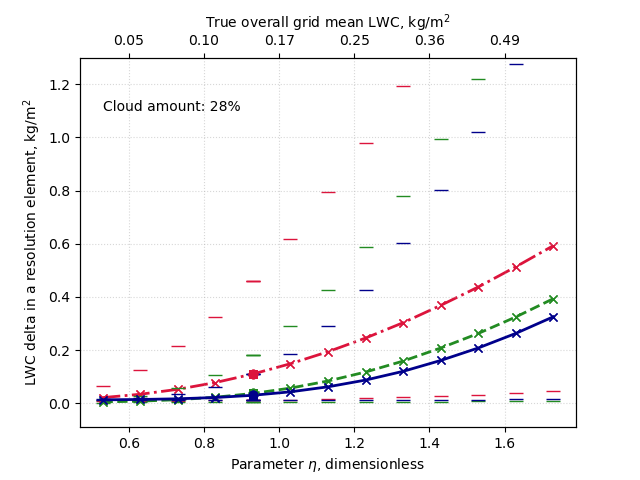

/tmp/ipykernel_23018/2843658047.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


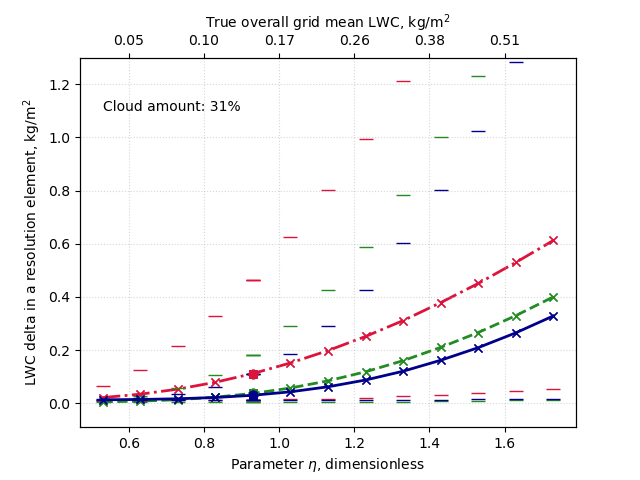

/tmp/ipykernel_23018/2843658047.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


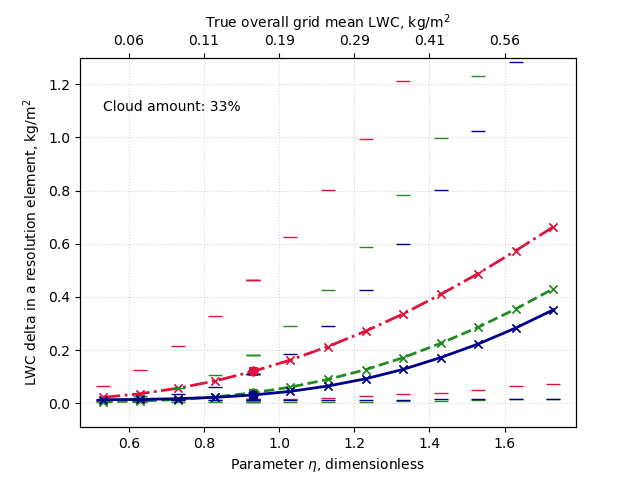

/tmp/ipykernel_23018/2843658047.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


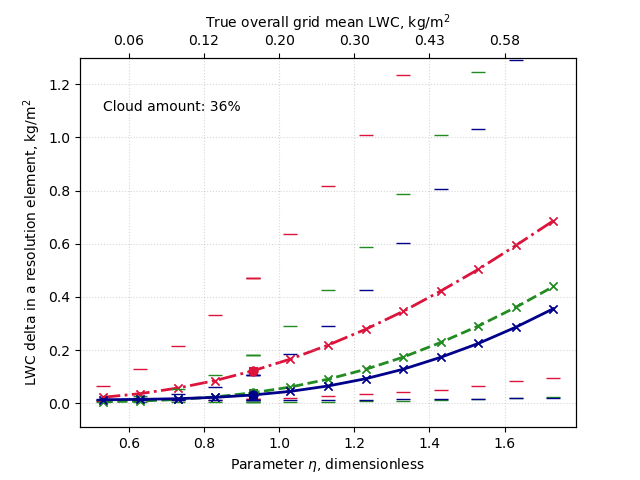

/tmp/ipykernel_23018/2843658047.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


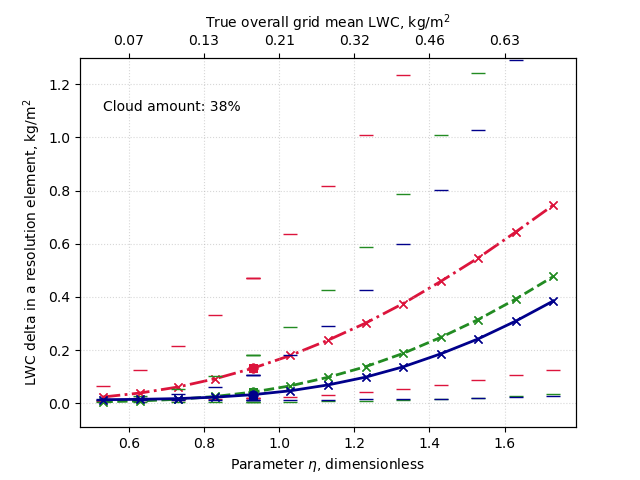

/tmp/ipykernel_23018/2843658047.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


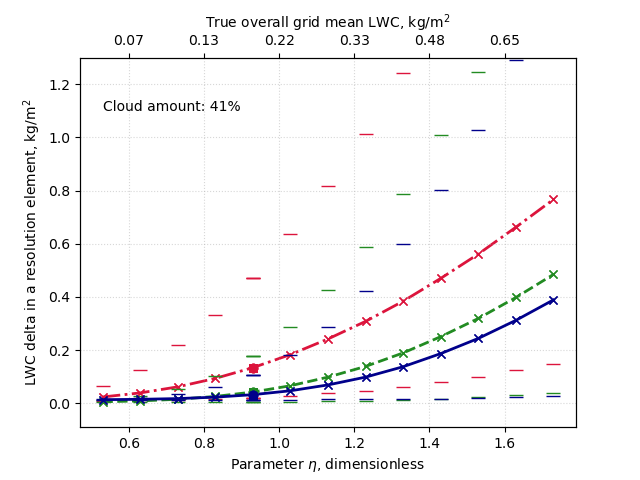

/tmp/ipykernel_23018/2843658047.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


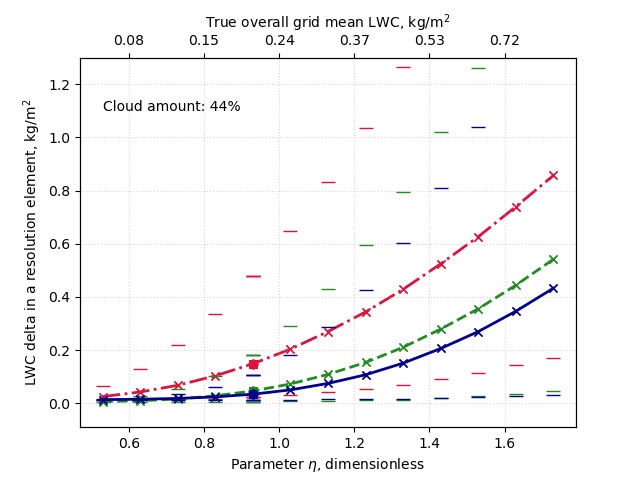

/tmp/ipykernel_23018/2843658047.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


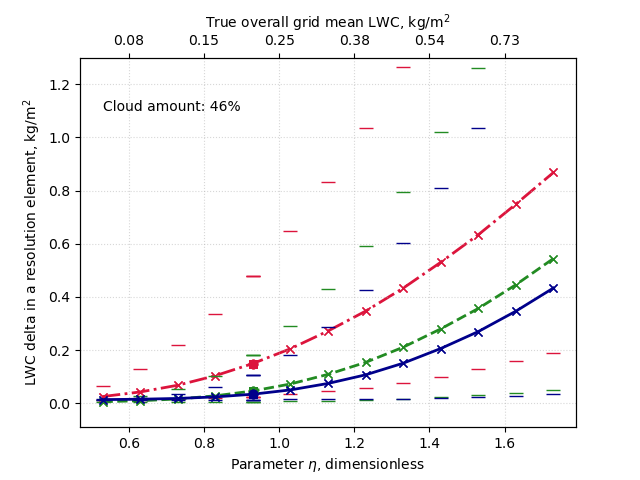

/tmp/ipykernel_23018/2843658047.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


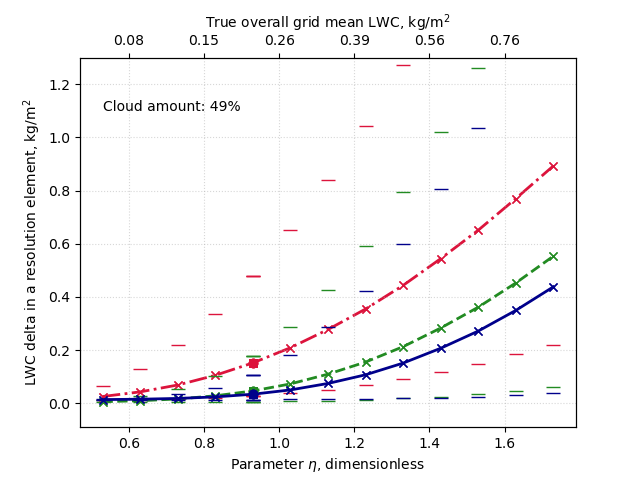

/tmp/ipykernel_23018/2843658047.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


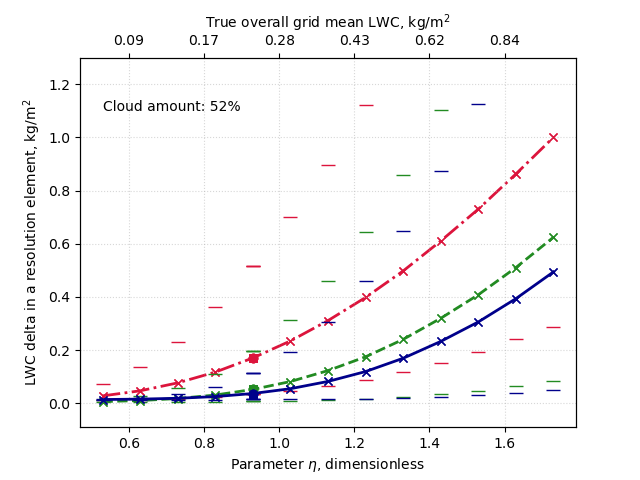

/tmp/ipykernel_23018/2843658047.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


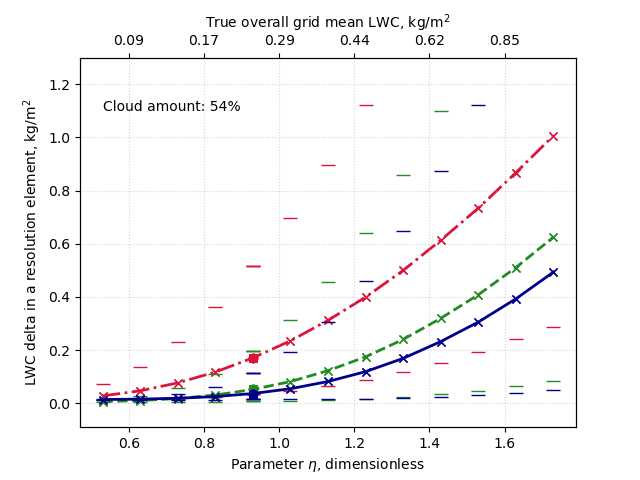

/tmp/ipykernel_23018/2843658047.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


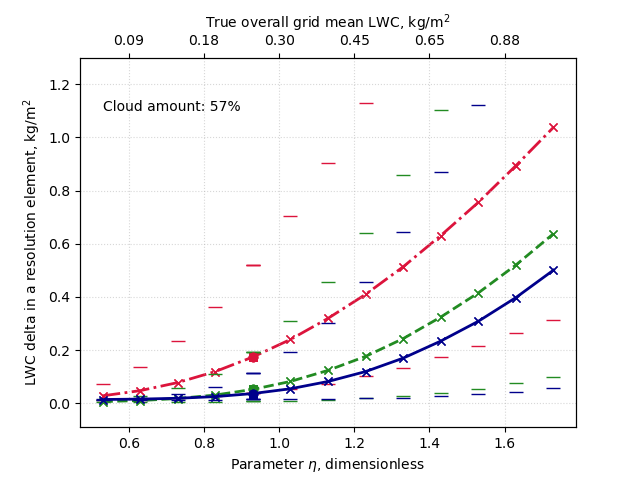

/tmp/ipykernel_23018/2843658047.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


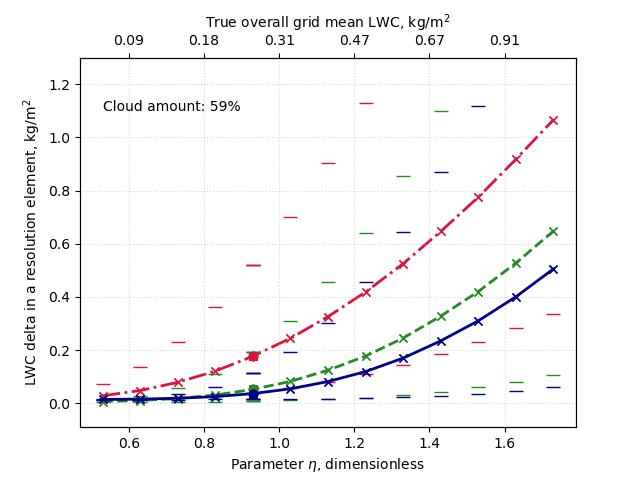

/tmp/ipykernel_23018/2843658047.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


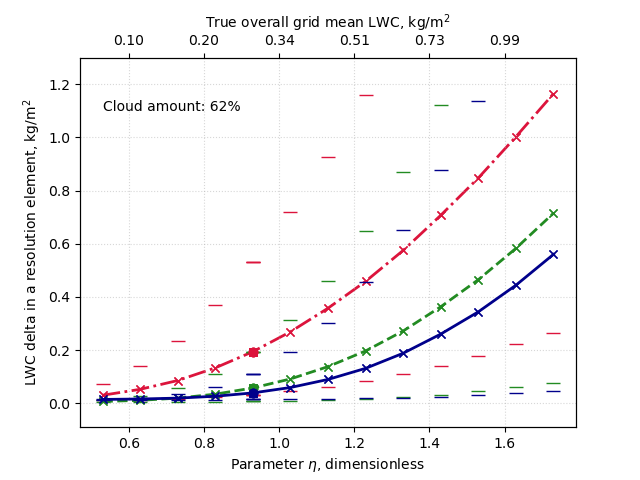

/tmp/ipykernel_23018/2843658047.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


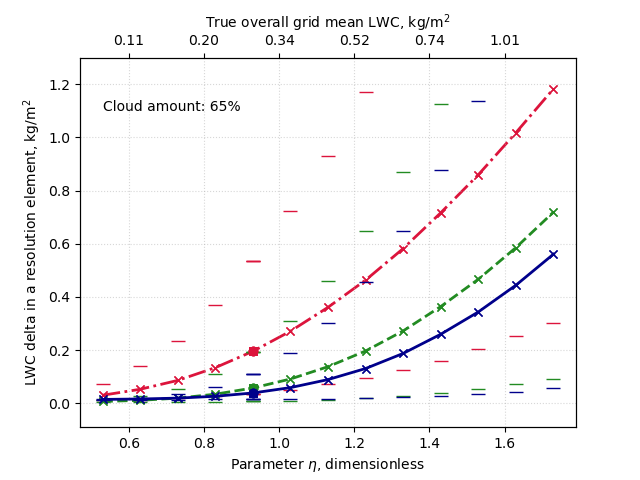

/tmp/ipykernel_23018/2843658047.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


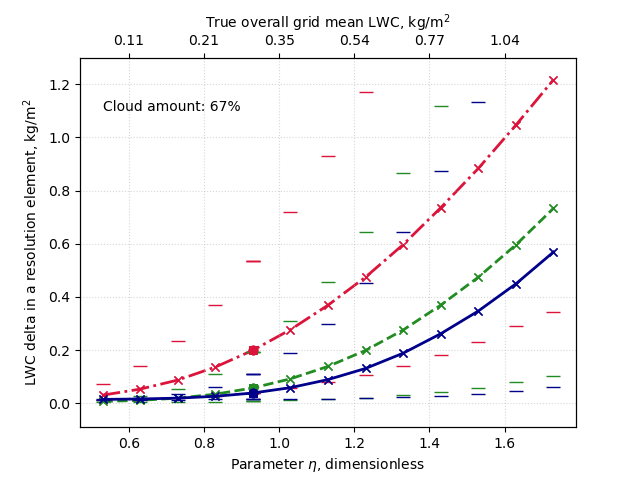

/tmp/ipykernel_23018/2843658047.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


In [39]:
from scipy.interpolate import interp1d

savepath = os.path.join('fig', 'fixed_axes', 'L2', 'eta_variance', 'LWC')
if not os.path.exists(savepath):
    os.makedirs(savepath)

for i, p in enumerate(np.unique(data.dist('L2').select(beta=0.3).get('required_percentage'))[:-1]):
    
    plt.figure()

    # plt.title('L2')

    eta, *W = \
        data.dist('L2').select(beta=0.3, required_percentage=p, nu1=22.2, nu2=27).get(
           'eta', 'Delta_Wrs'
        )
    eta, Delta_Wrs = bind(eta, *W)
    plt.plot(eta, means(Delta_Wrs), marker='x', color='darkblue', linewidth=2, linestyle='-', zorder=100)
    err = np.asarray(list(zip(means(Delta_Wrs) - mins(Delta_Wrs), maxs(Delta_Wrs) - means(Delta_Wrs)))).T
    plt.errorbar(eta, means(Delta_Wrs), err, 
                 fmt='x', markersize=6, capsize=5, elinewidth=0, alpha=1, color='darkblue', zorder=99)
    plt.plot(eta[eta==0.93], means(Delta_Wrs)[eta==0.93], marker='o', color='darkblue', zorder=999)

    eta, *W = \
        data.dist('L2').select(beta=0.3, required_percentage=p, nu1=22.2, nu2=36).get(
           'eta', 'Delta_Wrs'
        )
    eta, Delta_Wrs = bind(eta, *W)
    plt.plot(eta, means(Delta_Wrs), marker='x', color='forestgreen', linewidth=2, linestyle='--', zorder=10)
    err = np.asarray(list(zip(means(Delta_Wrs) - mins(Delta_Wrs), maxs(Delta_Wrs) - means(Delta_Wrs)))).T
    plt.errorbar(eta, means(Delta_Wrs), err, 
                 fmt='x', markersize=6, capsize=5, elinewidth=0, alpha=1, color='forestgreen', zorder=9)
    plt.plot(eta[eta==0.93], means(Delta_Wrs)[eta==0.93], marker='o', color='forestgreen', zorder=998)
    
    eta, *W = \
        data.dist('L2').select(beta=0.3, required_percentage=p, nu1=22.2, nu2=89).get(
           'eta', 'W_TRUE', 'Delta_Wrs'
        )
    eta, W_TRUE, Delta_Wrs = bind(eta, *W)
    plt.plot(eta, means(Delta_Wrs), marker='x', color='crimson', linewidth=2, linestyle='-.', zorder=1)
    err = np.asarray(list(zip(means(Delta_Wrs) - mins(Delta_Wrs), maxs(Delta_Wrs) - means(Delta_Wrs)))).T
    plt.errorbar(eta, means(Delta_Wrs), err, 
                 fmt='x', markersize=6, capsize=5, elinewidth=0, alpha=1, color='crimson', zorder=0)
    plt.plot(eta[eta==0.93], means(Delta_Wrs)[eta==0.93], marker='o', color='crimson', zorder=997)

    plt.xlabel(r'Parameter $\eta$, dimensionless')
    plt.ylabel(r'LWC delta in a resolution element, kg/m$^2$')
    
    plt.ylim((-0.09, 1.3))
    plt.text(np.min(eta), 1.1, 'Cloud amount: {:.0f}%'.format(np.round(p*100, decimals=0)))
    
    plt.grid(linestyle=':', alpha=0.5)
    
    f = interp1d(eta, W_TRUE)
    xticks = plt.xticks()[0]
    ax = plt.gca()
    xlim = ax.get_xlim()
    ax2 = ax.twiny()
    ax2.set_xlim(xlim)
    ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])
    ax2.set_xlabel(r'True overall grid mean LWC, kg/m$^2$')
    
    plt.savefig(os.path.join(savepath, '{}.png'.format(str(i).zfill(2))), dpi=300)

##### TWV

<IPython.core.display.Javascript object>


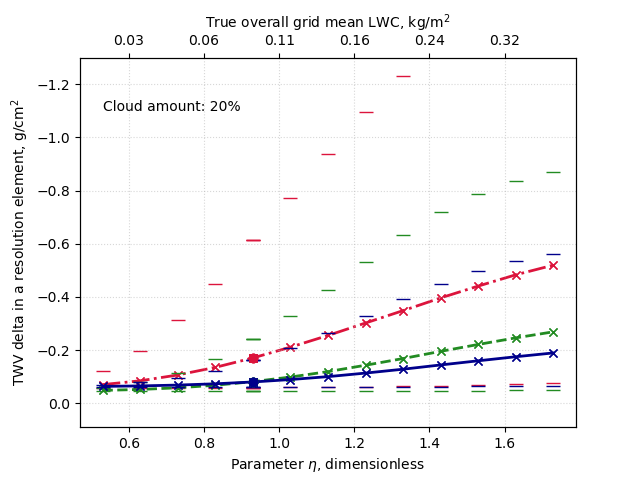

/tmp/ipykernel_23018/1256238320.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


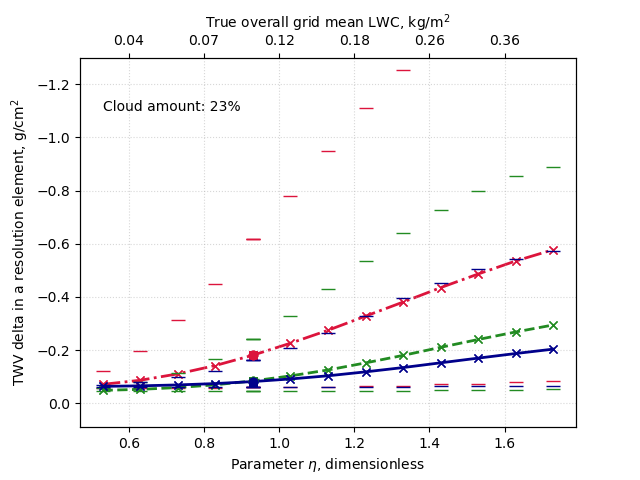

/tmp/ipykernel_23018/1256238320.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


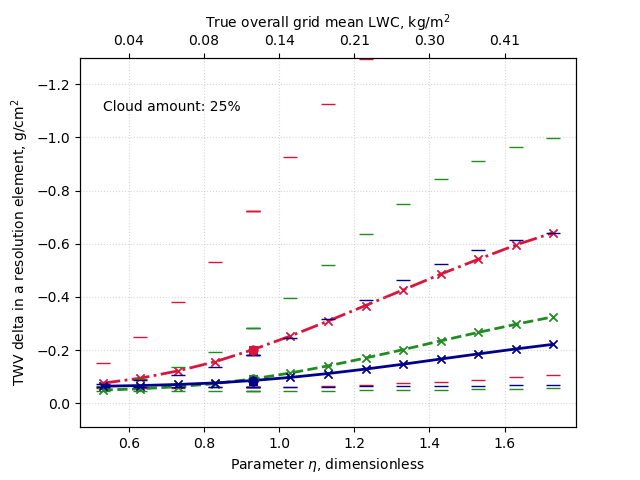

/tmp/ipykernel_23018/1256238320.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


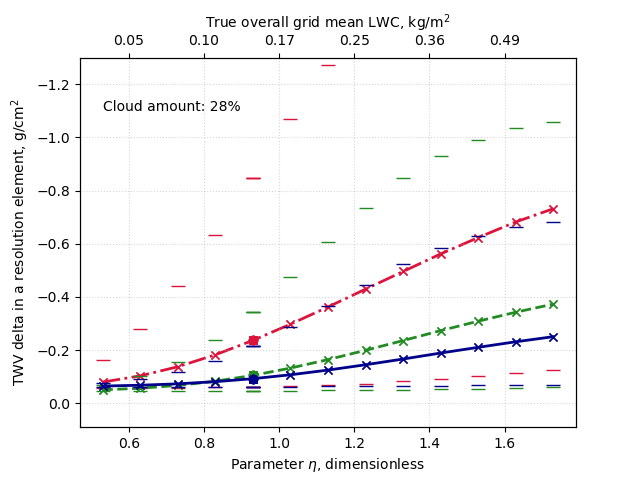

/tmp/ipykernel_23018/1256238320.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


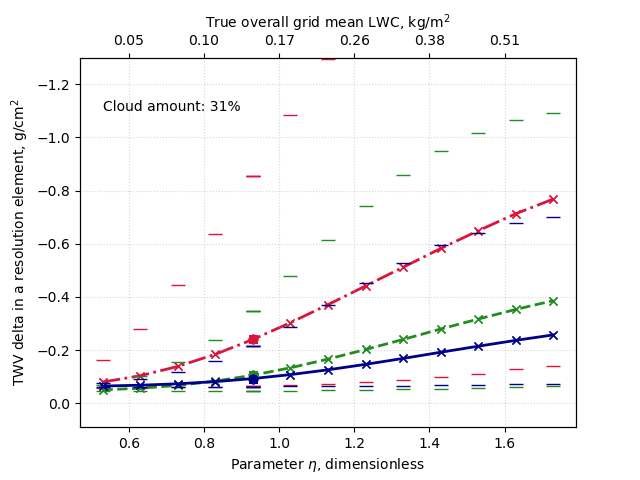

/tmp/ipykernel_23018/1256238320.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


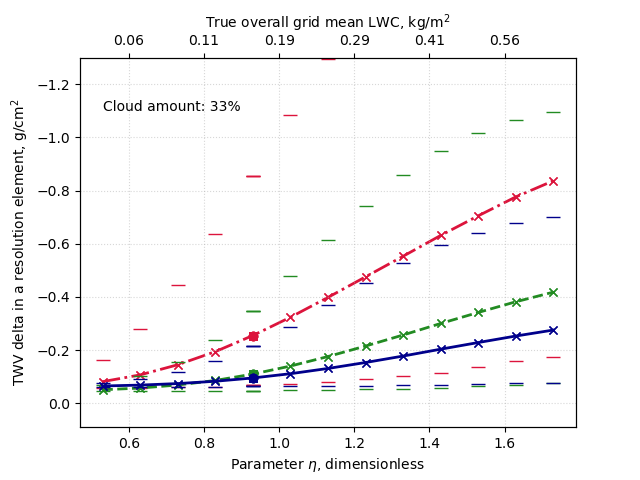

/tmp/ipykernel_23018/1256238320.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


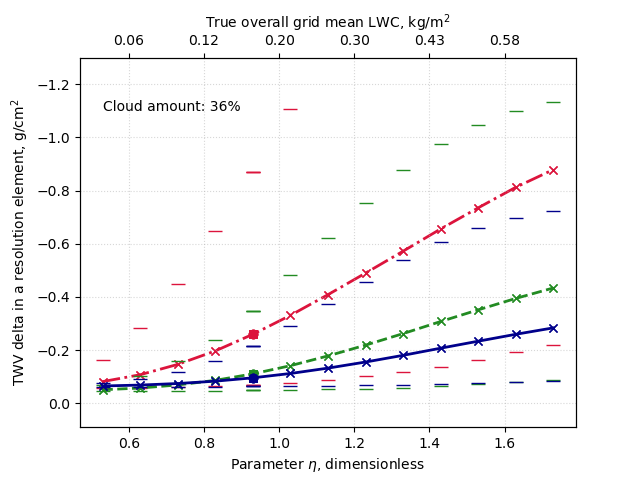

/tmp/ipykernel_23018/1256238320.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


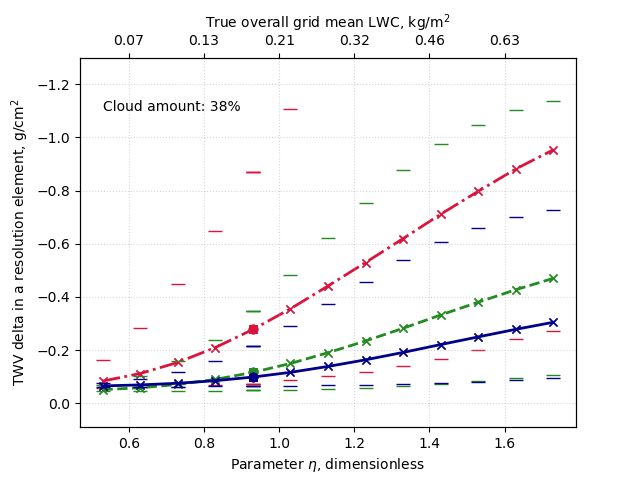

/tmp/ipykernel_23018/1256238320.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


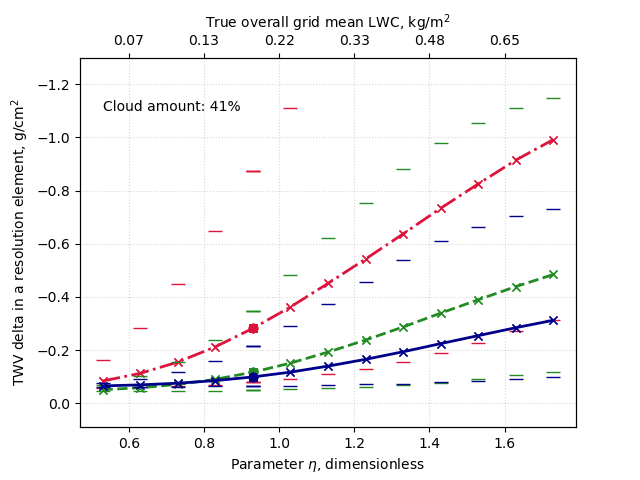

/tmp/ipykernel_23018/1256238320.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


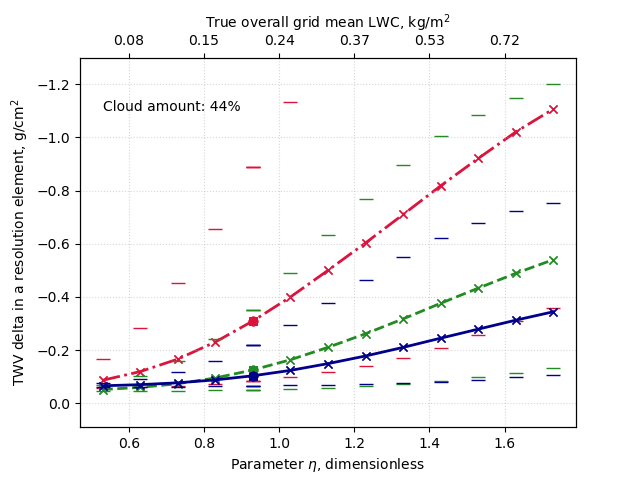

/tmp/ipykernel_23018/1256238320.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


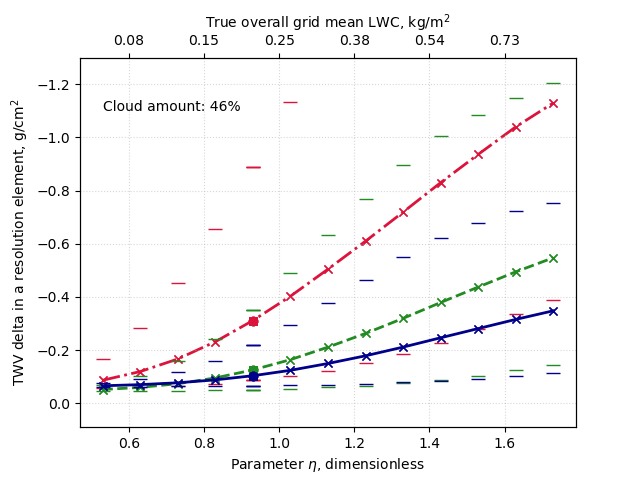

/tmp/ipykernel_23018/1256238320.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


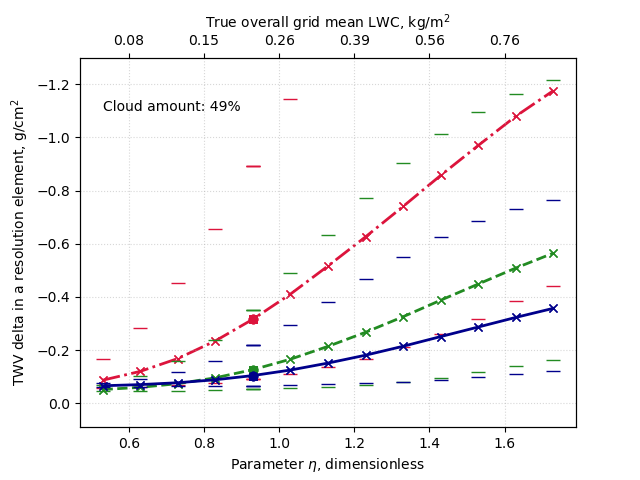

/tmp/ipykernel_23018/1256238320.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


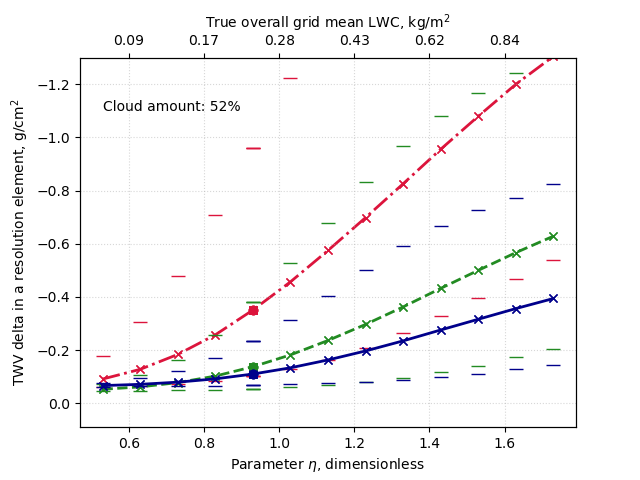

/tmp/ipykernel_23018/1256238320.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


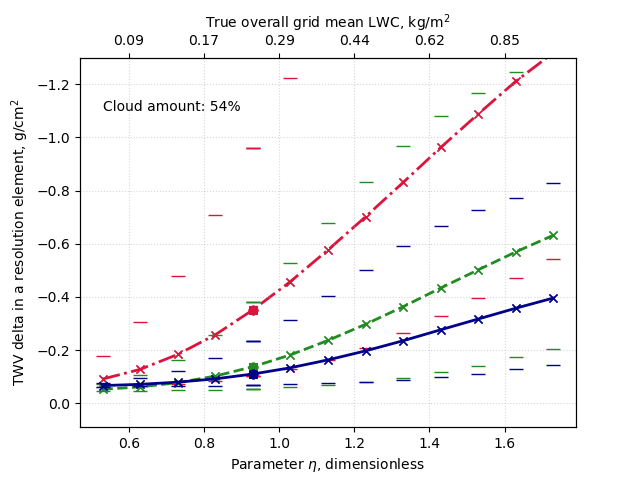

/tmp/ipykernel_23018/1256238320.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


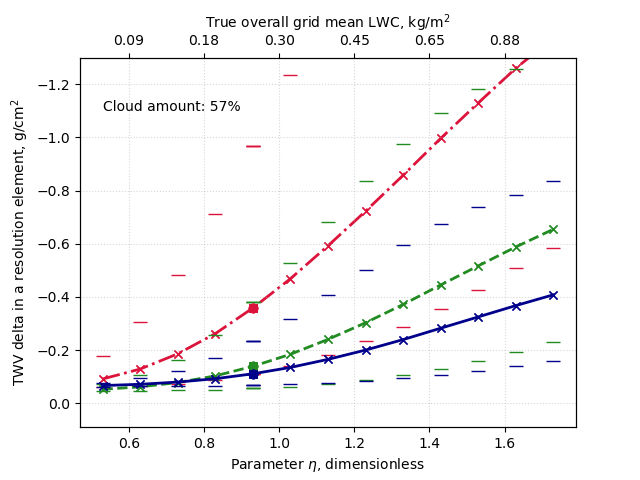

/tmp/ipykernel_23018/1256238320.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


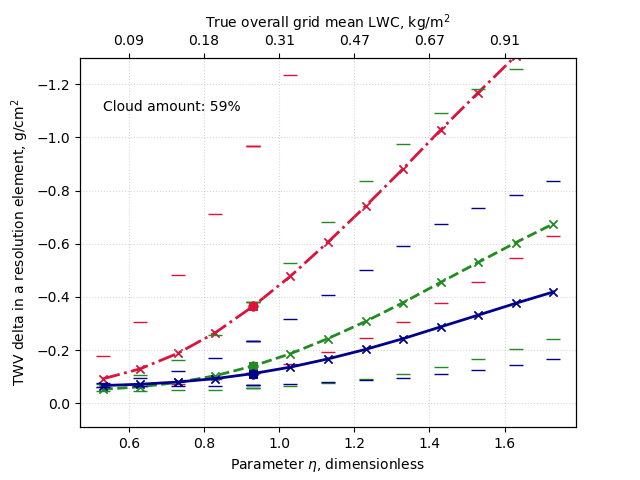

/tmp/ipykernel_23018/1256238320.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


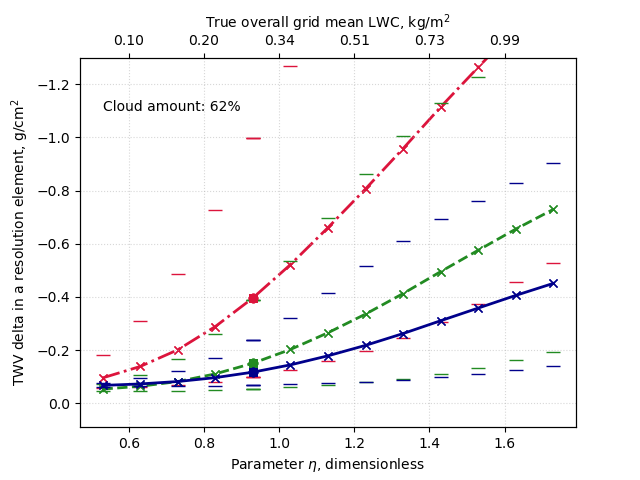

/tmp/ipykernel_23018/1256238320.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


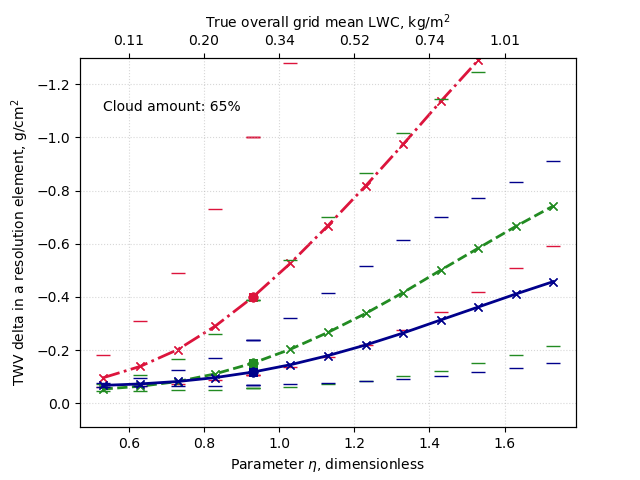

/tmp/ipykernel_23018/1256238320.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


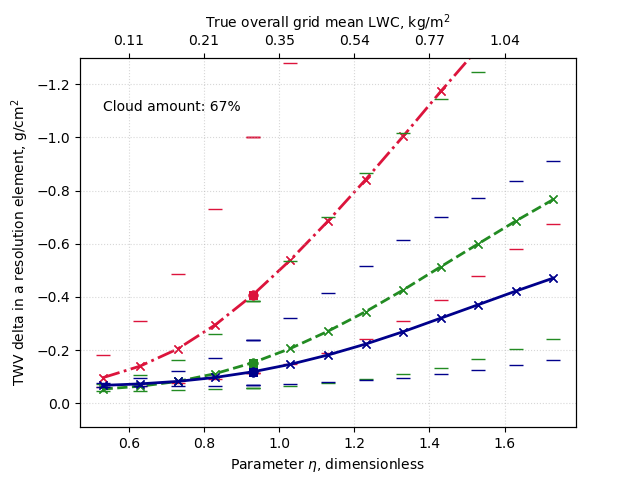

/tmp/ipykernel_23018/1256238320.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


In [40]:
from scipy.interpolate import interp1d

savepath = os.path.join('fig', 'fixed_axes', 'L2', 'eta_variance', 'TWV')
if not os.path.exists(savepath):
    os.makedirs(savepath)

for i, p in enumerate(np.unique(data.dist('L2').select(beta=0.3).get('required_percentage'))[:-1]):
    
    plt.figure()

    # plt.title('L2')

    eta, *Q = \
        data.dist('L2').select(beta=0.3, required_percentage=p, nu1=22.2, nu2=27).get(
           'eta', 'Delta_Qrs'
        )
    eta, Delta_Qrs = bind(eta, *Q)
    plt.plot(eta, means(Delta_Qrs), marker='x', color='darkblue', linewidth=2, linestyle='-', zorder=100)
    err = np.asarray(list(zip(means(Delta_Qrs) - mins(Delta_Qrs), maxs(Delta_Qrs) - means(Delta_Qrs)))).T
    plt.errorbar(eta, means(Delta_Qrs), err, 
                 fmt='x', markersize=6, capsize=5, elinewidth=0, alpha=1, color='darkblue', zorder=99)
    plt.plot(eta[eta==0.93], means(Delta_Qrs)[eta==0.93], marker='o', color='darkblue', zorder=999)

    eta, *Q = \
        data.dist('L2').select(beta=0.3, required_percentage=p, nu1=22.2, nu2=36).get(
           'eta', 'Delta_Qrs'
        )
    eta, Delta_Qrs = bind(eta, *Q)
    plt.plot(eta, means(Delta_Qrs), marker='x', color='forestgreen', linewidth=2, linestyle='--', zorder=10)
    err = np.asarray(list(zip(means(Delta_Qrs) - mins(Delta_Qrs), maxs(Delta_Qrs) - means(Delta_Qrs)))).T
    plt.errorbar(eta, means(Delta_Qrs), err, 
                 fmt='x', markersize=6, capsize=5, elinewidth=0, alpha=1, color='forestgreen', zorder=9)
    plt.plot(eta[eta==0.93], means(Delta_Qrs)[eta==0.93], marker='o', color='forestgreen', zorder=998)
    
    eta, W_TRUE, *Q = \
        data.dist('L2').select(beta=0.3, required_percentage=p, nu1=22.2, nu2=89).get(
           'eta', 'W_TRUE', 'Delta_Qrs'
        )
    eta, W_TRUE, Delta_Qrs = bind(eta, W_TRUE, *Q)
    plt.plot(eta, means(Delta_Qrs), marker='x', color='crimson', linewidth=2, linestyle='-.', zorder=1)
    err = np.asarray(list(zip(means(Delta_Qrs) - mins(Delta_Qrs), maxs(Delta_Qrs) - means(Delta_Qrs)))).T
    plt.errorbar(eta, means(Delta_Qrs), err, 
                 fmt='x', markersize=6, capsize=5, elinewidth=0, alpha=1, color='crimson', zorder=0)
    plt.plot(eta[eta==0.93], means(Delta_Qrs)[eta==0.93], marker='o', color='crimson', zorder=997)

    plt.xlabel(r'Parameter $\eta$, dimensionless')
    plt.ylabel(r'TWV delta in a resolution element, g/cm$^2$')
    
    plt.ylim((0.09, -1.3))
    plt.text(np.min(eta), -1.1, 'Cloud amount: {:.0f}%'.format(np.round(p*100, decimals=0)))
    
    plt.grid(linestyle=':', alpha=0.5)
    
    f = interp1d(eta, W_TRUE)
    xticks = plt.xticks()[0]
    ax = plt.gca()
    xlim = ax.get_xlim()
    ax2 = ax.twiny()
    ax2.set_xlim(xlim)
    ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])
    ax2.set_xlabel(r'True overall grid mean LWC, kg/m$^2$')
    
    plt.savefig(os.path.join(savepath, '{}.png'.format(str(i).zfill(2))), dpi=300)

#### beta variance, eta fixed

##### LWC

<IPython.core.display.Javascript object>


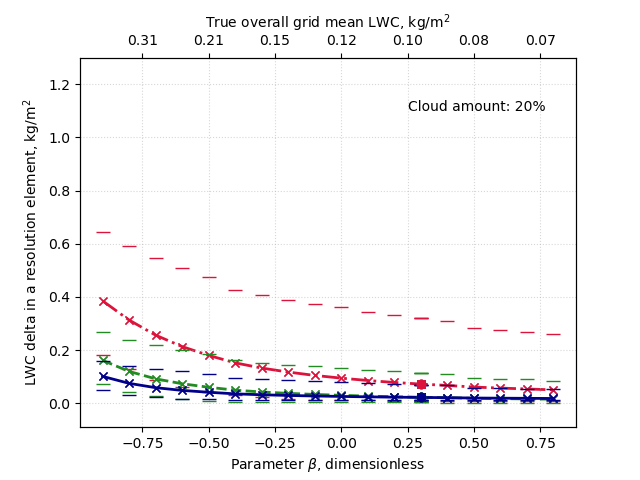

/tmp/ipykernel_23018/2231516183.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


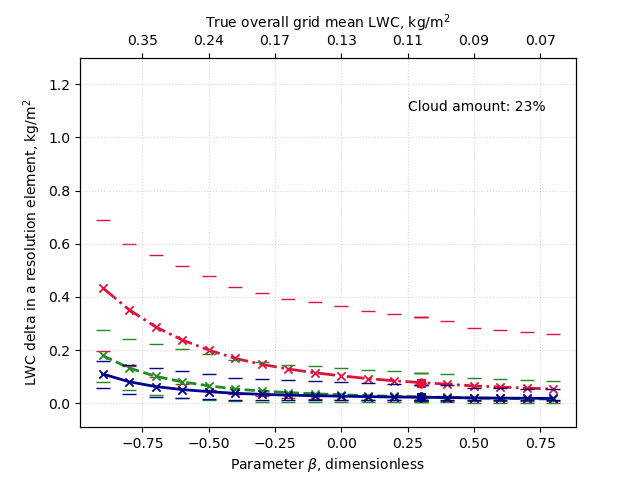

/tmp/ipykernel_23018/2231516183.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


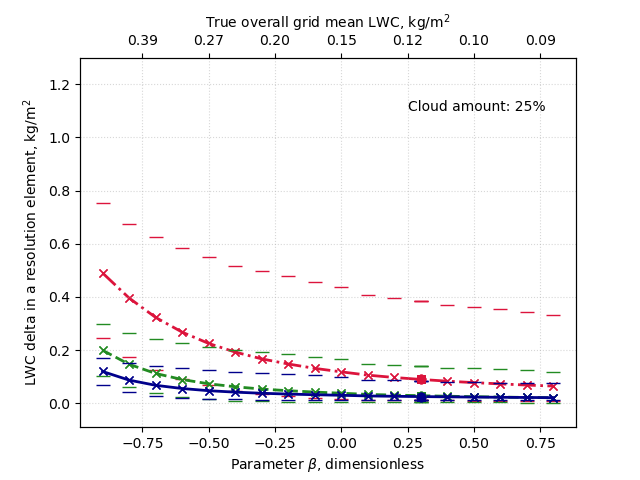

/tmp/ipykernel_23018/2231516183.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


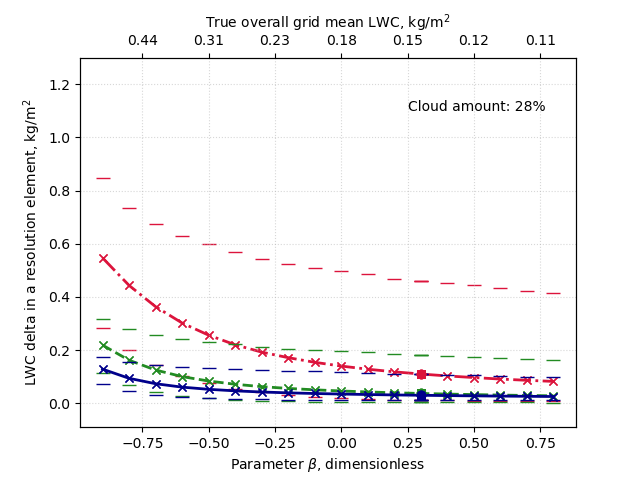

/tmp/ipykernel_23018/2231516183.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


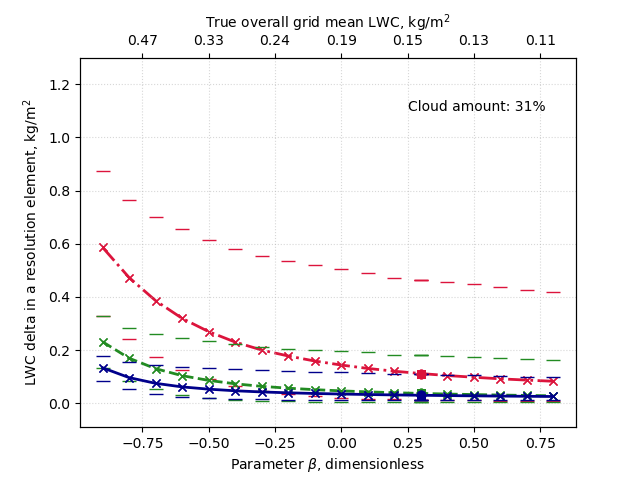

/tmp/ipykernel_23018/2231516183.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


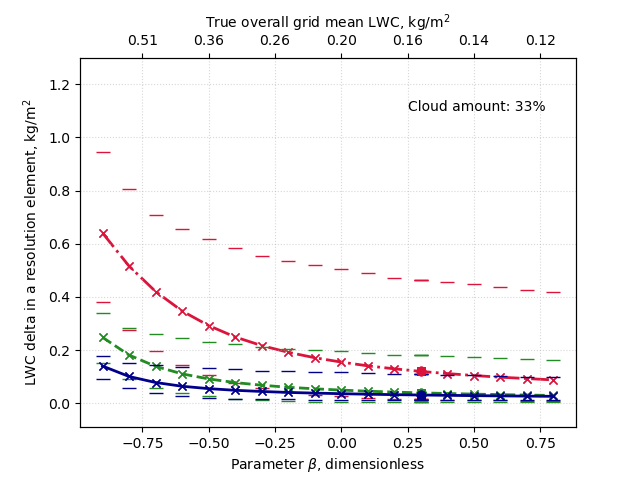

/tmp/ipykernel_23018/2231516183.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


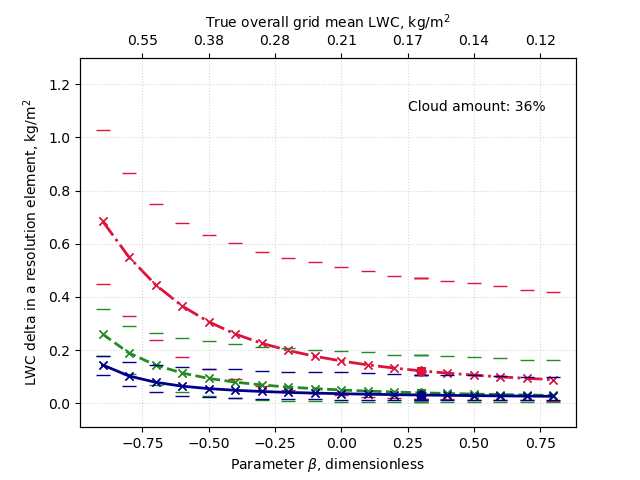

/tmp/ipykernel_23018/2231516183.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


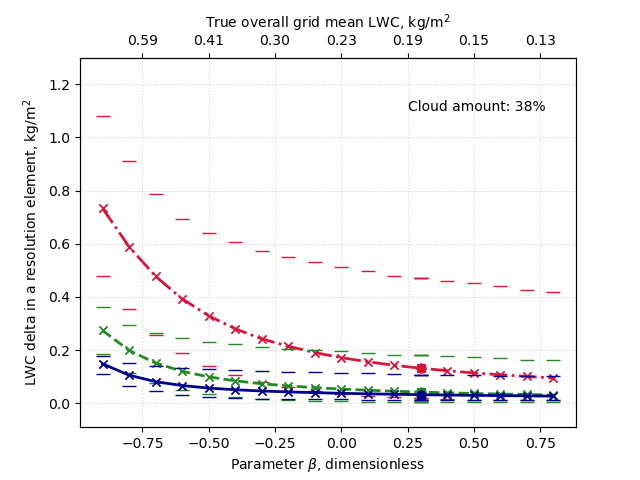

/tmp/ipykernel_23018/2231516183.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


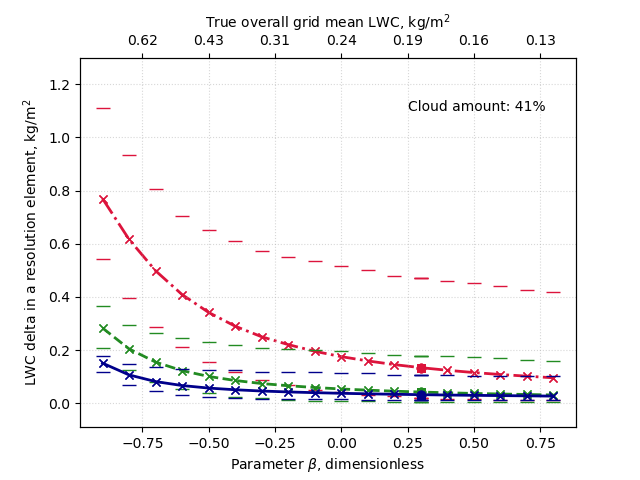

/tmp/ipykernel_23018/2231516183.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


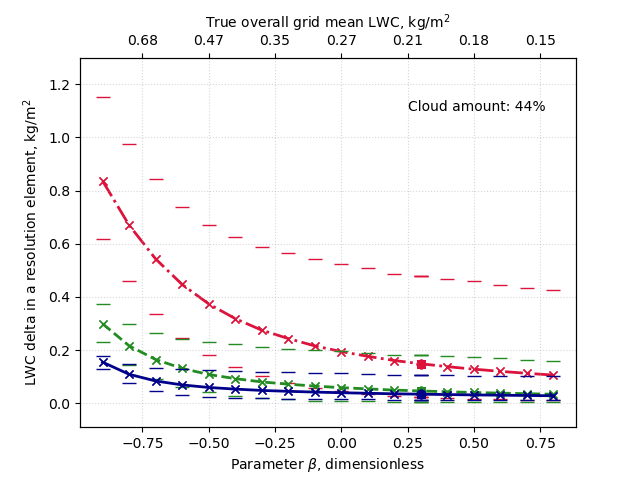

/tmp/ipykernel_23018/2231516183.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


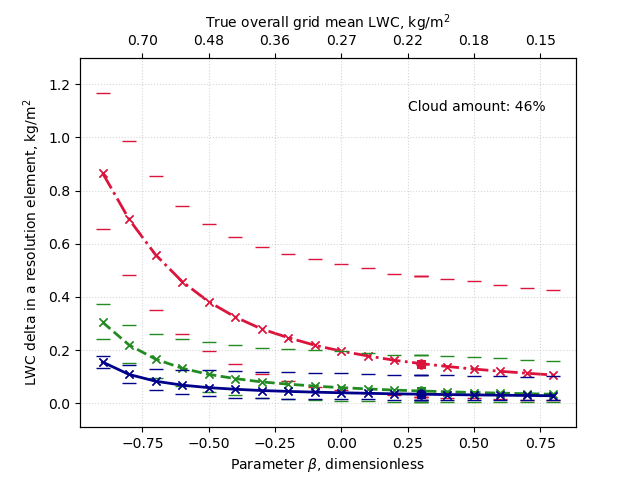

/tmp/ipykernel_23018/2231516183.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


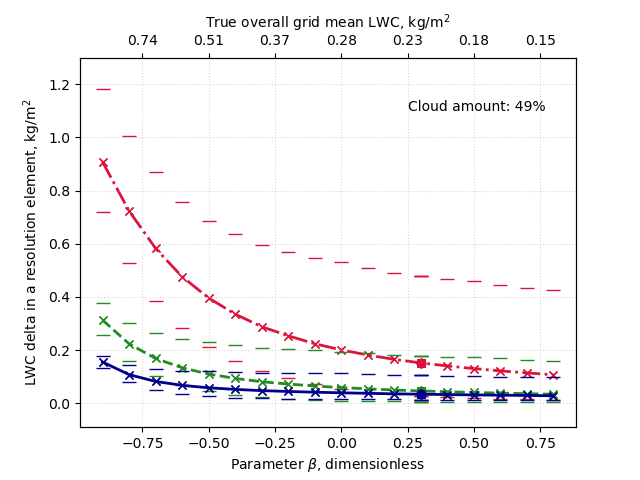

/tmp/ipykernel_23018/2231516183.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


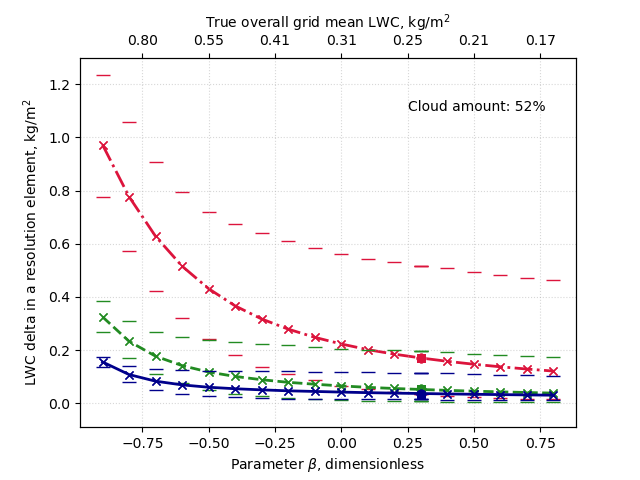

/tmp/ipykernel_23018/2231516183.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


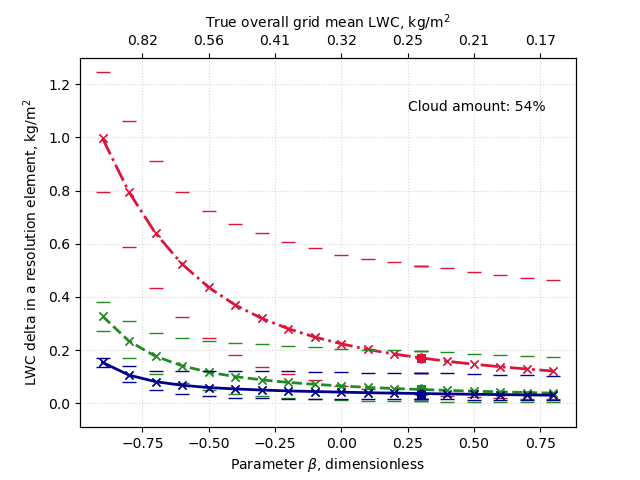

/tmp/ipykernel_23018/2231516183.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


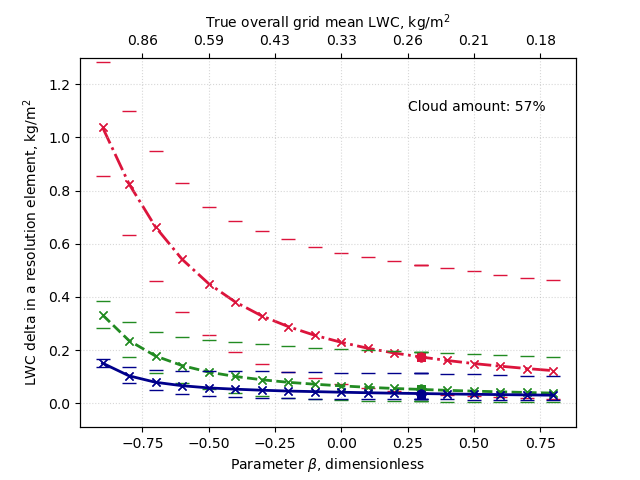

/tmp/ipykernel_23018/2231516183.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


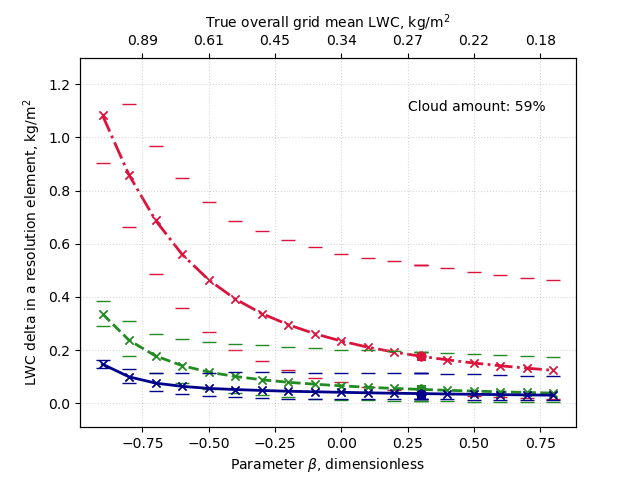

/tmp/ipykernel_23018/2231516183.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


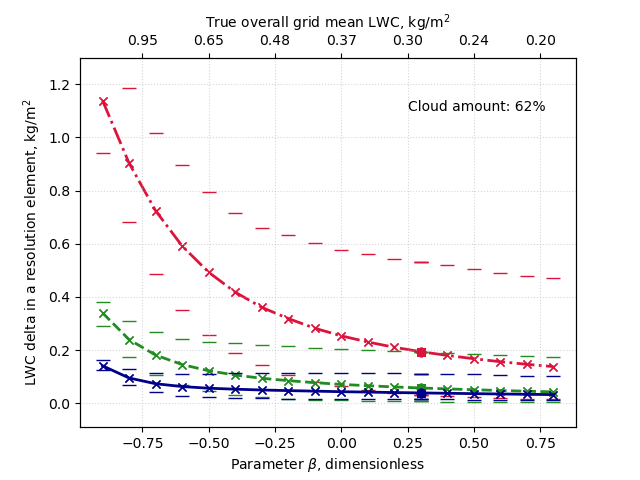

/tmp/ipykernel_23018/2231516183.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


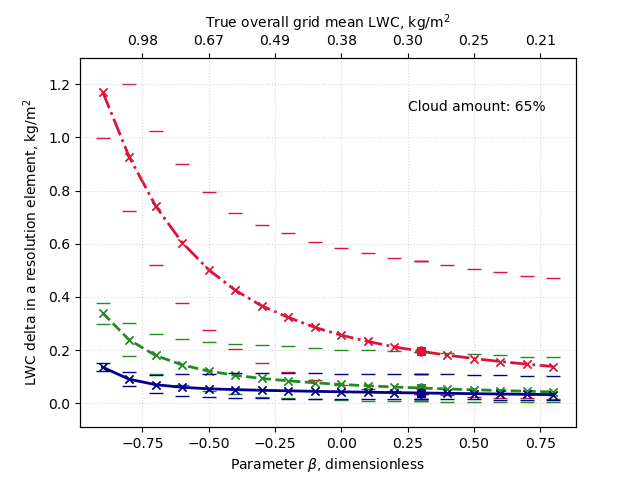

/tmp/ipykernel_23018/2231516183.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


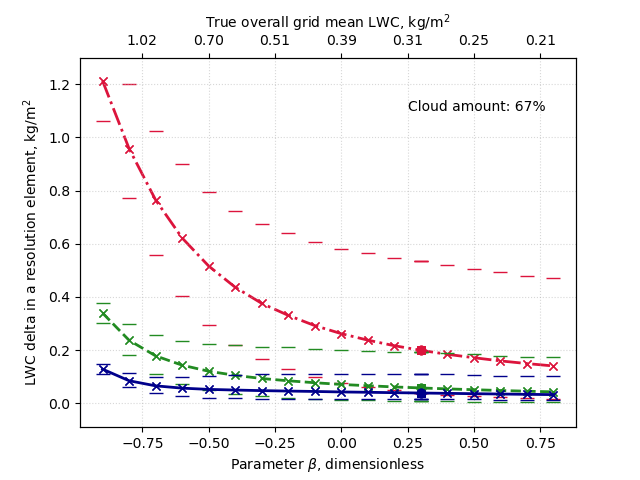

/tmp/ipykernel_23018/2231516183.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


In [41]:
from scipy.interpolate import interp1d

savepath = os.path.join('fig', 'fixed_axes', 'L2', 'beta_variance', 'LWC')
if not os.path.exists(savepath):
    os.makedirs(savepath)

for i, p in enumerate(np.unique(data.dist('L2').select(eta=0.93).get('required_percentage'))[:-1]):
    
    plt.figure()

    # plt.title('L2')

    beta, *W = \
        data.dist('L2').select(eta=0.93, required_percentage=p, nu1=22.2, nu2=27).get(
           'beta', 'Delta_Wrs'
        )
    beta, Delta_Wrs = bind(beta, *W)
    plt.plot(beta, means(Delta_Wrs), marker='x', color='darkblue', linewidth=2, linestyle='-', zorder=100)
    err = np.asarray(list(zip(means(Delta_Wrs) - mins(Delta_Wrs), maxs(Delta_Wrs) - means(Delta_Wrs)))).T
    plt.errorbar(beta, means(Delta_Wrs), err, 
                 fmt='x', markersize=6, capsize=5, elinewidth=0, alpha=1, color='darkblue', zorder=99)
    plt.plot(beta[beta==0.3], means(Delta_Wrs)[beta==0.3], marker='o', color='darkblue', zorder=999)

    beta, *W = \
        data.dist('L2').select(eta=0.93, required_percentage=p, nu1=22.2, nu2=36).get(
           'beta', 'Delta_Wrs'
        )
    beta, Delta_Wrs = bind(beta, *W)
    plt.plot(beta, means(Delta_Wrs), marker='x', color='forestgreen', linewidth=2, linestyle='--', zorder=10)
    err = np.asarray(list(zip(means(Delta_Wrs) - mins(Delta_Wrs), maxs(Delta_Wrs) - means(Delta_Wrs)))).T
    plt.errorbar(beta, means(Delta_Wrs), err, 
                 fmt='x', markersize=6, capsize=5, elinewidth=0, alpha=1, color='forestgreen', zorder=9)
    plt.plot(beta[beta==0.3], means(Delta_Wrs)[beta==0.3], marker='o', color='forestgreen', zorder=998)
    
    beta, *W = \
        data.dist('L2').select(eta=0.93, required_percentage=p, nu1=22.2, nu2=89).get(
           'beta', 'W_TRUE', 'Delta_Wrs'
        )
    beta, W_TRUE, Delta_Wrs = bind(beta, *W)
    plt.plot(beta, means(Delta_Wrs), marker='x', color='crimson', linewidth=2, linestyle='-.', zorder=1)
    err = np.asarray(list(zip(means(Delta_Wrs) - mins(Delta_Wrs), maxs(Delta_Wrs) - means(Delta_Wrs)))).T
    plt.errorbar(beta, means(Delta_Wrs), err, 
                 fmt='x', markersize=6, capsize=5, elinewidth=0, alpha=1, color='crimson', zorder=0)
    plt.plot(beta[beta==0.3], means(Delta_Wrs)[beta==0.3], marker='o', color='crimson', zorder=997)

    plt.xlabel(r'Parameter $\beta$, dimensionless')
    plt.ylabel(r'LWC delta in a resolution element, kg/m$^2$')
    
    plt.ylim((-0.09, 1.3))
    plt.text(0.25, 1.1, 'Cloud amount: {:.0f}%'.format(np.round(p*100, decimals=0)))
    
    plt.grid(linestyle=':', alpha=0.5)
    
    f = interp1d(beta, W_TRUE)
    xticks = plt.xticks()[0]
    ax = plt.gca()
    xlim = ax.get_xlim()
    ax2 = ax.twiny()
    ax2.set_xlim(xlim)
    ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])
    ax2.set_xlabel(r'True overall grid mean LWC, kg/m$^2$')
    
    plt.savefig(os.path.join(savepath, '{}.png'.format(str(i).zfill(2))), dpi=300)

##### TWV

<IPython.core.display.Javascript object>


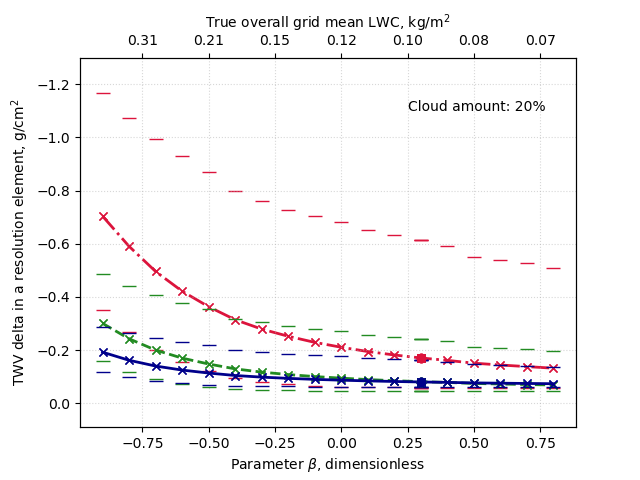

/tmp/ipykernel_23018/1419692773.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


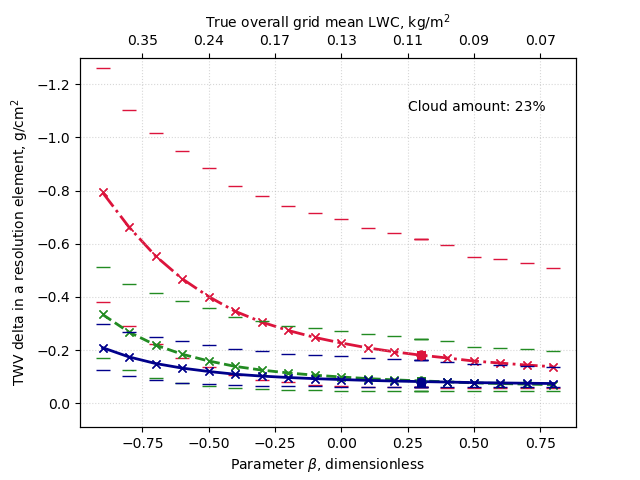

/tmp/ipykernel_23018/1419692773.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


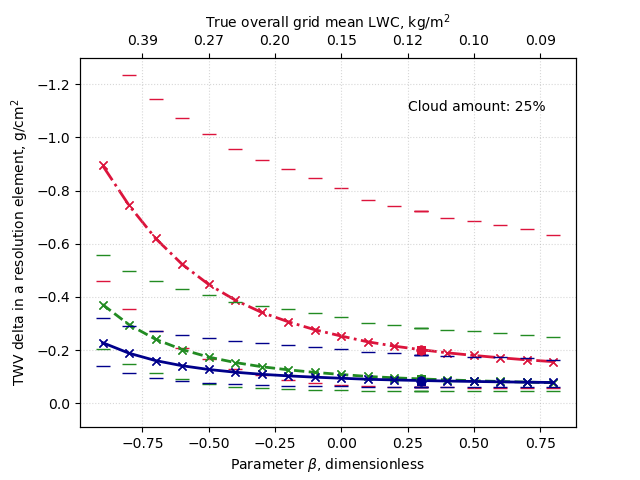

/tmp/ipykernel_23018/1419692773.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


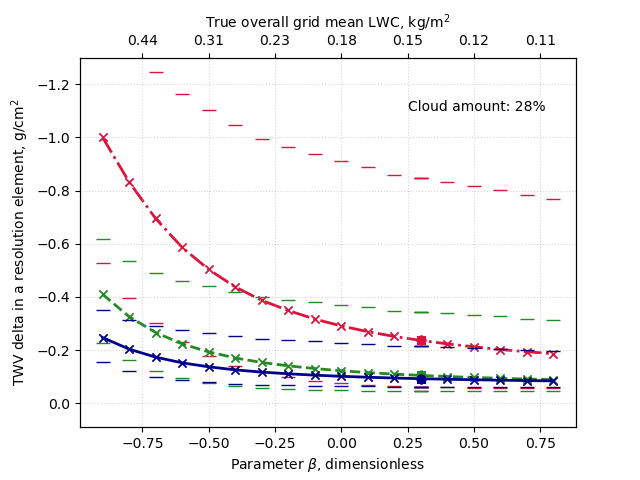

/tmp/ipykernel_23018/1419692773.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


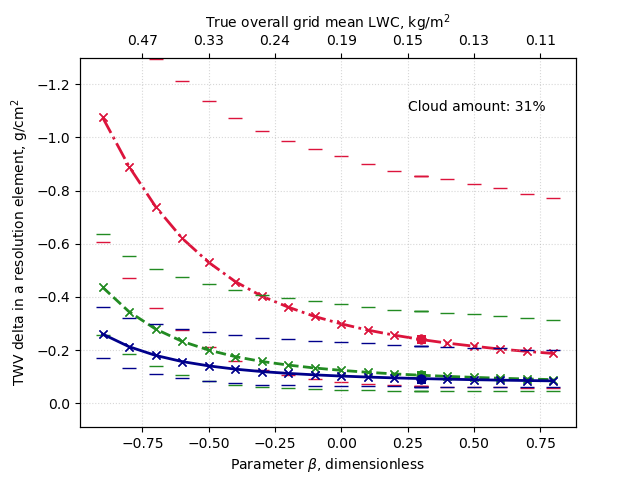

/tmp/ipykernel_23018/1419692773.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


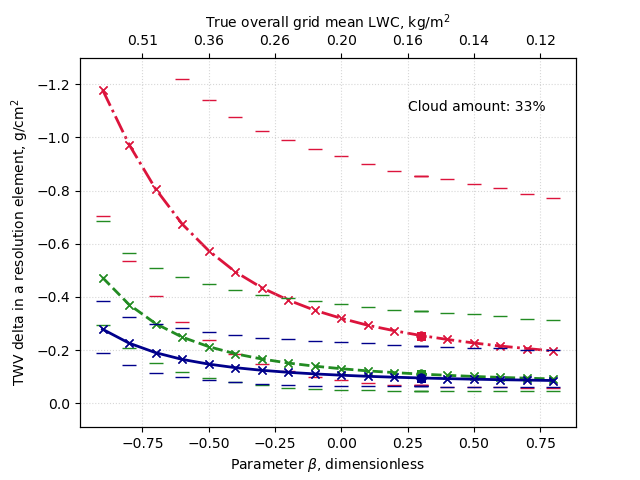

/tmp/ipykernel_23018/1419692773.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


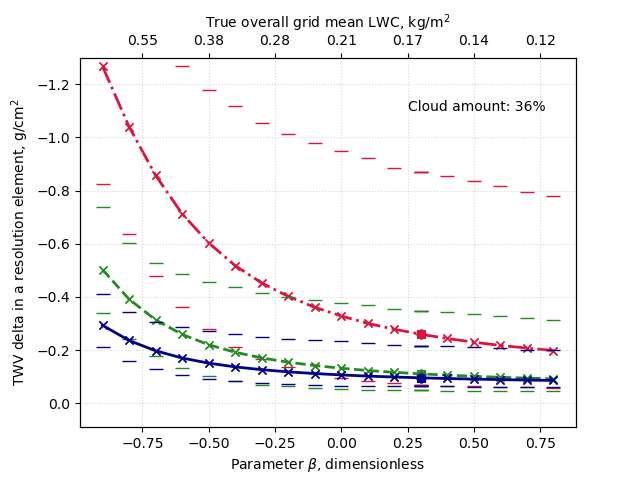

/tmp/ipykernel_23018/1419692773.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


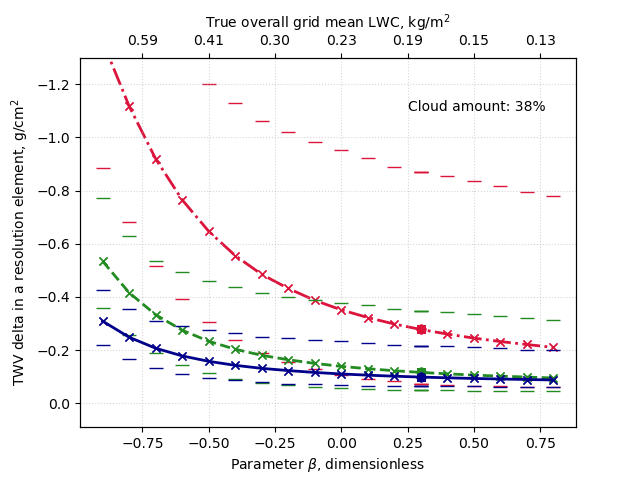

/tmp/ipykernel_23018/1419692773.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


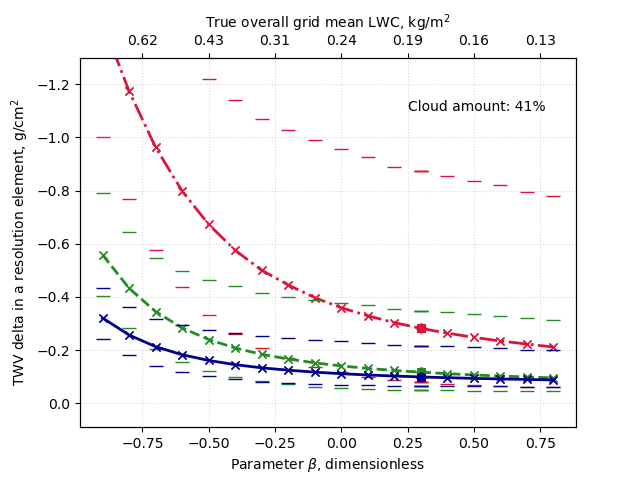

/tmp/ipykernel_23018/1419692773.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


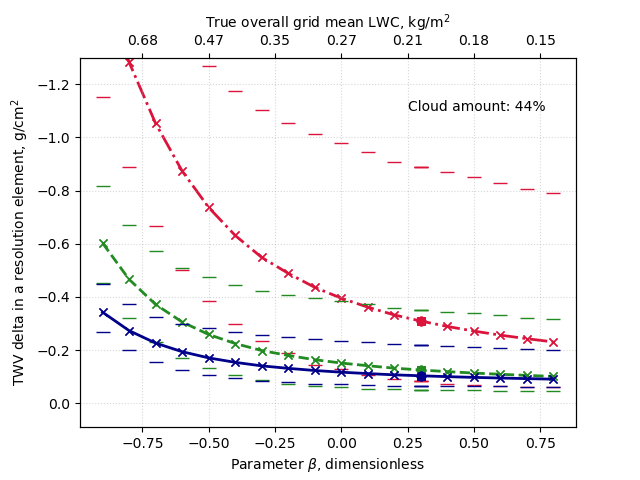

/tmp/ipykernel_23018/1419692773.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


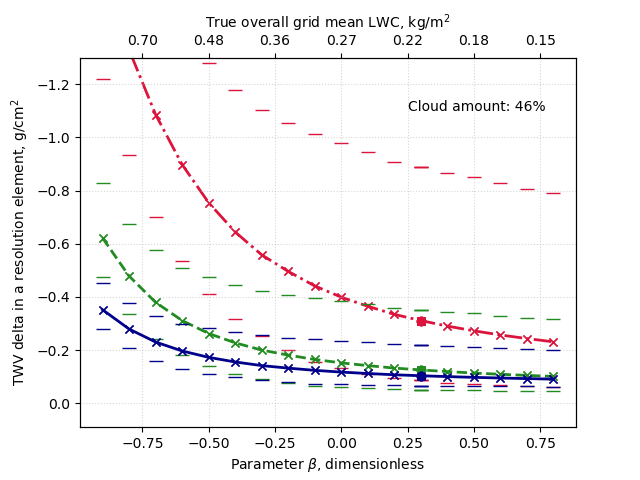

/tmp/ipykernel_23018/1419692773.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


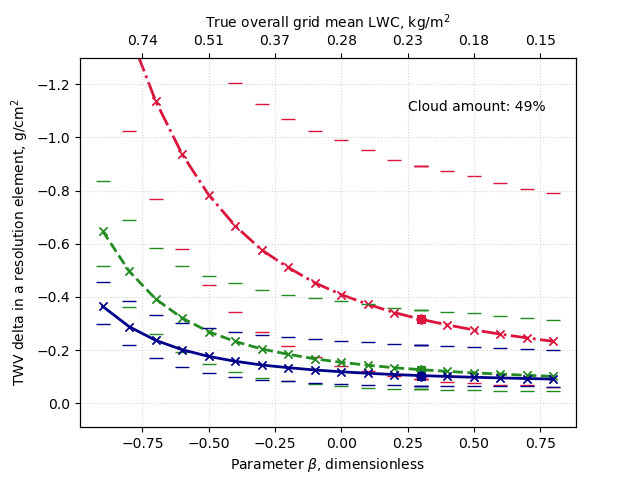

/tmp/ipykernel_23018/1419692773.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


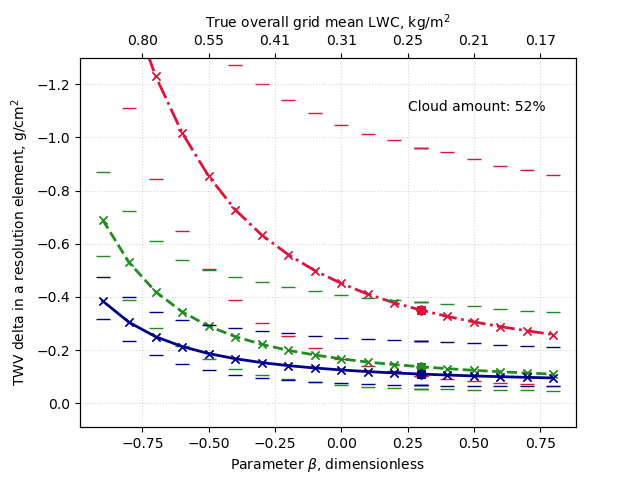

/tmp/ipykernel_23018/1419692773.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


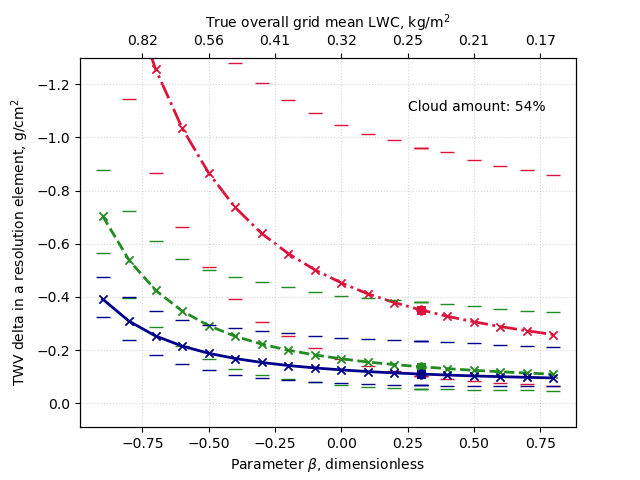

/tmp/ipykernel_23018/1419692773.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


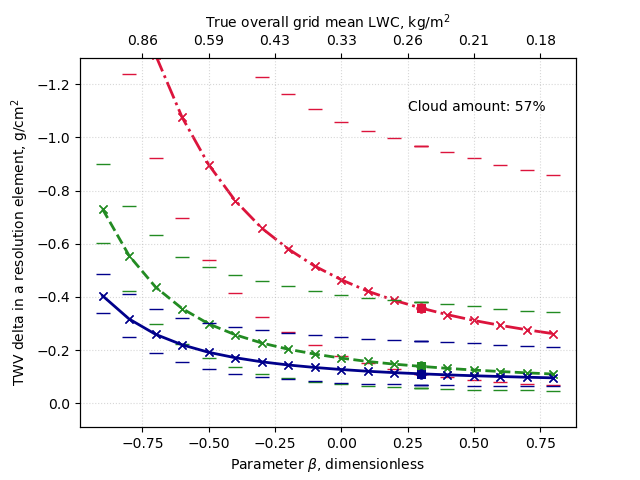

/tmp/ipykernel_23018/1419692773.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


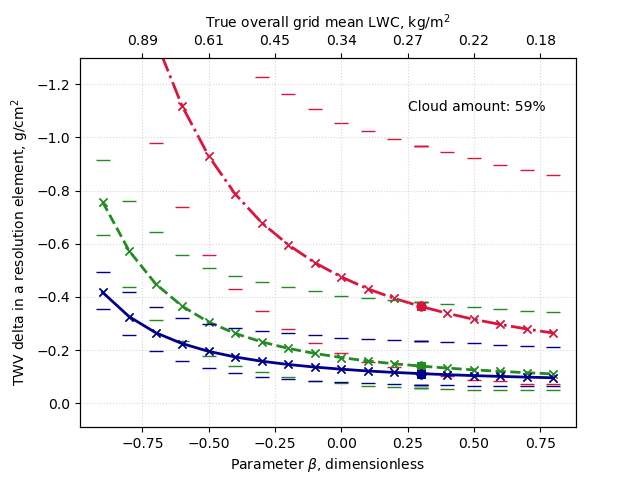

/tmp/ipykernel_23018/1419692773.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


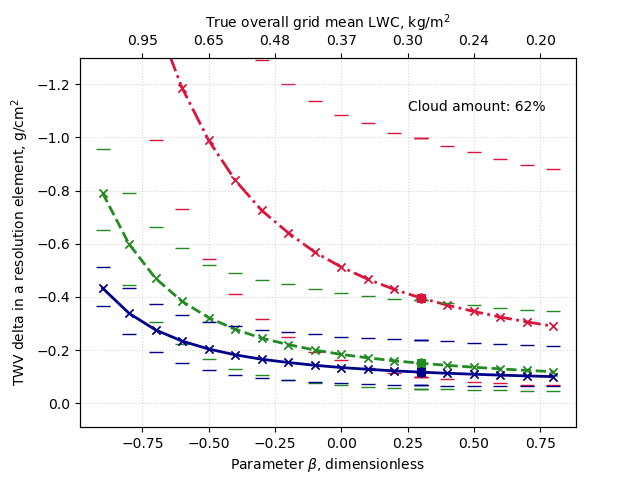

/tmp/ipykernel_23018/1419692773.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


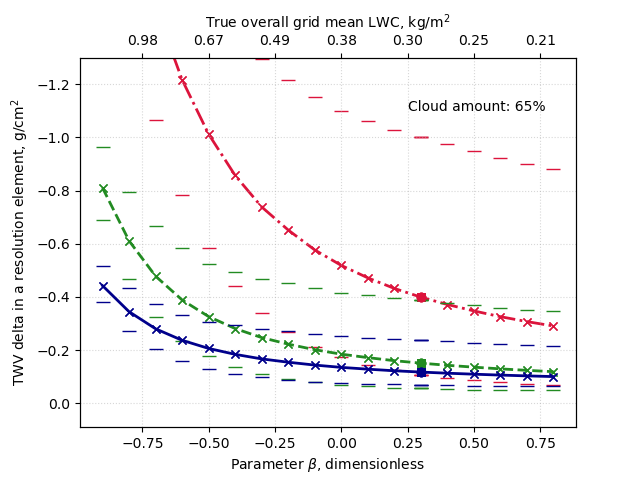

/tmp/ipykernel_23018/1419692773.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


<IPython.core.display.Javascript object>


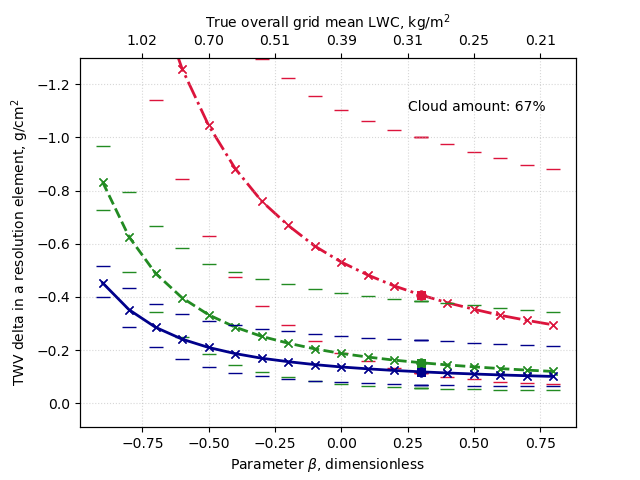

/tmp/ipykernel_23018/1419692773.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])


In [42]:
from scipy.interpolate import interp1d

savepath = os.path.join('fig', 'fixed_axes', 'L2', 'beta_variance', 'TWV')
if not os.path.exists(savepath):
    os.makedirs(savepath)

for i, p in enumerate(np.unique(data.dist('L2').select(eta=0.93).get('required_percentage'))[:-1]):
    
    plt.figure()

    # plt.title('L2')

    beta, *Q = \
        data.dist('L2').select(eta=0.93, required_percentage=p, nu1=22.2, nu2=27).get(
           'beta', 'Delta_Qrs'
        )
    beta, Delta_Qrs = bind(beta, *Q)
    plt.plot(beta, means(Delta_Qrs), marker='x', color='darkblue', linewidth=2, linestyle='-', zorder=100)
    err = np.asarray(list(zip(means(Delta_Qrs) - mins(Delta_Qrs), maxs(Delta_Qrs) - means(Delta_Qrs)))).T
    plt.errorbar(beta, means(Delta_Qrs), err, 
                 fmt='x', markersize=6, capsize=5, elinewidth=0, alpha=1, color='darkblue', zorder=99)
    plt.plot(beta[beta==0.3], means(Delta_Qrs)[beta==0.3], marker='o', color='darkblue', zorder=999)

    beta, *Q = \
        data.dist('L2').select(eta=0.93, required_percentage=p, nu1=22.2, nu2=36).get(
           'beta', 'Delta_Qrs'
        )
    beta, Delta_Qrs = bind(beta, *Q)
    plt.plot(beta, means(Delta_Qrs), marker='x', color='forestgreen', linewidth=2, linestyle='--', zorder=10)
    err = np.asarray(list(zip(means(Delta_Qrs) - mins(Delta_Qrs), maxs(Delta_Qrs) - means(Delta_Qrs)))).T
    plt.errorbar(beta, means(Delta_Qrs), err, 
                 fmt='x', markersize=6, capsize=5, elinewidth=0, alpha=1, color='forestgreen', zorder=9)
    plt.plot(beta[beta==0.3], means(Delta_Qrs)[beta==0.3], marker='o', color='forestgreen', zorder=998)
    
    beta, W_TRUE, *Q = \
        data.dist('L2').select(eta=0.93, required_percentage=p, nu1=22.2, nu2=89).get(
           'beta', 'W_TRUE', 'Delta_Qrs'
        )
    beta, W_TRUE, Delta_Qrs = bind(beta, W_TRUE, *Q)
    plt.plot(beta, means(Delta_Qrs), marker='x', color='crimson', linewidth=2, linestyle='-.', zorder=1)
    err = np.asarray(list(zip(means(Delta_Qrs) - mins(Delta_Qrs), maxs(Delta_Qrs) - means(Delta_Qrs)))).T
    plt.errorbar(beta, means(Delta_Qrs), err, 
                 fmt='x', markersize=6, capsize=5, elinewidth=0, alpha=1, color='crimson', zorder=0)
    plt.plot(beta[beta==0.3], means(Delta_Qrs)[beta==0.3], marker='o', color='crimson', zorder=997)

    plt.xlabel(r'Parameter $\beta$, dimensionless')
    plt.ylabel(r'TWV delta in a resolution element, g/cm$^2$')
    
    plt.ylim((0.09, -1.3))
    plt.text(0.25, -1.1, 'Cloud amount: {:.0f}%'.format(np.round(p*100, decimals=0)))
    
    plt.grid(linestyle=':', alpha=0.5)
    
    f = interp1d(beta, W_TRUE)
    xticks = plt.xticks()[0]
    ax = plt.gca()
    xlim = ax.get_xlim()
    ax2 = ax.twiny()
    ax2.set_xlim(xlim)
    ax2.set_xticklabels(['', *map(lambda val: '{:.2f}'.format(np.round(val, decimals=2)), f(xticks[1:-1])), ''])
    ax2.set_xlabel(r'True overall grid mean LWC, kg/m$^2$')
    
    plt.savefig(os.path.join(savepath, '{}.png'.format(str(i).zfill(2))), dpi=300)